# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them and find the best one that will help identify failures so that the generator could be repaired before failing/breaking and the overall maintenance cost of the generators can be brought down. 

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a wind turbine where there is no detection by model. 
- False positives (FP) are detections in a wind turbine where there is no failure. 

So, the maintenance cost associated with the model would be:

**Maintenance cost** = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
where,

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

Here the objective is to reduce the maintenance cost so, we want a metric that could reduce the maintenance cost.

- The minimum possible maintenance cost  =  `Actual failures*(Repair cost) = (TP + FN)*(Repair cost)`
- The maintenance cost associated with model = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`

So, we will try to maximize the ratio of minimum possible maintenance cost and the maintenance cost associated with the model.

The value of this ratio will lie between 0 and 1, the ratio will be 1 only when the maintenance cost associated with the model will be equal to the minimum possible maintenance cost.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [386]:
import pandas as pd
import numpy as np



# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

#Let us break the X and y dataframes into training set and validation set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn import metrics
# To tune different models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

# To be used for creating pipelines
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 200)

## Loading Data

In [335]:
# loading the train dataset
data = pd.read_csv("Train.csv")

In [ ]:
# Make a copy of train dataset
df = data.copy()

In [337]:
# loading the test dataset
data_test = pd.read_csv("Test.csv")

In [5]:
# Make a copy of test dataset
df_test = data_test.copy()

In [6]:
np.random.seed(1)
data.sample(200)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
3841,-1.761261,1.725575,3.115833,-0.722076,1.636716,-0.665690,-1.947430,0.340637,-0.434492,-1.861200,-0.748612,1.483686,3.233458,-1.749122,-5.027887,-1.380684,-1.399922,2.132650,-1.505987,-2.451394,-4.512434,0.036412,0.488204,2.010276,-2.194374,5.600887,-4.419503,-3.459057,1.848695,3.183373,3.131519,4.559034,5.339557,-4.860047,3.971955,1.084243,-0.286629,-2.123846,0.088027,0.467075,0
12898,-0.319513,-3.223125,6.945362,-6.073991,0.560963,-1.151006,-1.368454,-0.203942,-3.529692,5.112241,-3.728806,2.433346,3.220423,1.316607,-1.652448,-0.902062,-6.406294,2.609491,-0.583582,-3.180174,-3.682714,-0.107914,-3.111936,1.132707,1.378427,2.399556,5.679397,-3.810228,-4.106580,-3.610371,9.925717,2.086696,0.300373,-0.581224,2.849599,11.783096,-1.036491,-2.656733,4.048503,-0.043561,0
15032,3.660333,-0.500171,1.673259,-0.759881,-3.446873,-0.177149,-0.150797,-0.962328,0.798321,-0.378106,2.456049,1.879260,2.194074,-1.375423,-1.303997,-3.645691,-1.916947,-0.564766,3.382290,-0.034927,-5.565015,2.032844,-0.867979,-1.966172,0.320279,-0.502116,2.028311,-0.768731,1.730565,3.023456,-2.705545,-3.397233,0.711632,0.350068,5.073397,-2.271627,-0.376924,-0.115856,-0.630295,-1.382311,0
36781,-2.031378,-7.075963,1.609581,-2.808285,-2.626699,-3.161704,-2.401735,2.357427,-1.254624,2.679572,-4.866034,5.473158,5.339906,2.596990,-5.179196,-2.976010,-0.568500,3.978816,1.724852,6.053674,-5.327246,3.560616,3.365471,-0.391724,1.284162,-5.200010,2.720958,-0.473470,-4.738653,0.069819,-1.207865,0.449110,-5.094617,2.979341,2.545381,7.661457,2.721677,-5.888977,3.233609,-2.895987,0
9201,-1.167479,4.636223,-1.011644,0.316850,3.275565,-0.310062,1.388811,4.651706,-4.848882,-2.074384,3.231886,5.032511,-2.634830,-2.825284,1.290487,6.432091,0.251476,-1.082105,0.626093,-7.337963,0.912257,-0.578727,5.034060,8.326799,-4.863529,5.333237,-8.192814,-1.593566,5.291905,6.553607,5.233752,10.877396,8.250367,-5.159849,4.674169,-3.516928,-1.730339,1.969370,-3.425079,2.554127,0
21288,-3.187048,3.810940,0.850021,1.188452,3.331867,-1.399935,-1.550283,0.635168,-0.389022,-2.848663,-3.003486,3.366907,2.550711,-2.365782,-6.294215,-2.694268,1.701079,3.318560,-0.941472,-2.522348,-4.691335,1.915986,4.572873,6.014727,-3.252703,6.471669,-7.581418,-2.034078,-0.284077,2.482489,0.878916,7.499800,3.778780,-5.057147,2.754992,-0.312605,0.304002,0.109490,-0.080787,-0.263837,0
37321,5.669580,1.844251,7.218002,1.555360,-3.158366,-2.388045,-0.937380,-2.299472,3.368328,-0.475084,-1.593526,-0.763408,4.474542,-1.536328,-2.689027,-7.051011,-1.965468,-2.414158,3.769097,0.893762,-9.227253,1.080952,-4.955377,-3.369827,2.379708,4.442623,3.109184,-2.405830,-1.814943,-1.632428,0.736474,-4.127790,-1.698119,-0.144663,6.158802,-0.501844,-2.075539,-3.096800,0.029782,-2.895171,0
8600,-2.459670,-2.393870,3.225757,0.063384,-0.580143,-2.797114,-0.634555,2.118902,-2.976534,2.924087,-3.354634,4.535033,0.790923,0.388404,-0.780539,0.137287,-0.147010,0.193798,4.075666,1.939926,-1.893998,0.262768,-0.026678,3.035784,0.127010,-0.972351,0.181684,0.249843,-2.562915,-0.478893,2.429896,2.392210,-2.040141,3.390597,2.891005,5.108812,0.085175,-1.349147,2.056523,-2.479685,0
33089,1.001489,0.983718,-2.561203,3.374567,2.495414,-0.720727,0.067609,3.662200,0.327424,-1.763364,-3.399646,-4.088555,-5.765949,1.293401,4.038515,3.405233,6.860836,-0.479386,-3.237459,2.401008,4.419077,-0.393963,2.743099,4.115304,1.274670,-1.566217,-4.673000,2.077497,-0.692994,-1.068473,2.815314,5.783949,-1.469405,-2.904733,-2.098224,-2.400717,-0.437158,-3.385150,-3.896752,3.312009,1
39511,-3.648807,-1.589335,-0.575212,0.649347,1.329551,-2.730112,-2.246243,2.806568,-0.600226,-1.071473,-5.598787,4.039250,2.624120,0.526896,-5.738545,-2.256579,3.684117,4.407944,-0.596813,3.524609,-3.745387,3.215177,6.282294,4.594613,-1.079856,-0.412728,-5.065619,-0.157468,-3.058230,1.398945,-1.026855,6.162144,-1.610211,-1.636248,1.450378,2.

In [7]:
# check number of rows and columns
data.shape

(40000, 41)

* The dataset has 40000 rows and 41 columns.

### Check for any missing data

In [8]:
#check for missing data
data.isna().sum().sort_values(ascending=False)

V1        46
V2        39
V40        0
V30        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V31        0
V39        0
V22        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V32        0
V21        0
V20        0
V10        0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V11        0
V19        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
Target     0
dtype: int64

* There are  missing data on V1 and V2 , 46 and 39 respectively

### Check for any missing data on the test set

In [387]:
#check for missing data
data_test.isna().sum().sort_values(ascending=False)

V1        11
V2         7
V40        0
V30        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V31        0
V39        0
V22        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V32        0
V21        0
V20        0
V10        0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V11        0
V19        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
Target     0
dtype: int64

* There are  missing data on V1 and V2 on the test set as well

* We will handle the missing data later

### Check the info of the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

* All of the columns are of the float64. These can be directly fed to the model.

#### Check for duplicates

### Let's check the duplicate data. And if any, we should remove it.

In [10]:
data[data.duplicated()].count()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

- Ther are no duplicates

In [11]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.0,-0.288120,3.449072,-13.501880,-2.751460,-0.773518,1.836708,17.436981
V2,39961.0,0.442672,3.139431,-13.212051,-1.638355,0.463939,2.537508,13.089269
V3,40000.0,2.505514,3.406263,-11.469369,0.202682,2.265319,4.584920,18.366477
V4,40000.0,-0.066078,3.437330,-16.015417,-2.349574,-0.123691,2.148596,13.279712
V5,40000.0,-0.044574,2.107183,-8.612973,-1.507206,-0.096824,1.346224,9.403469
V6,40000.0,-1.000849,2.036756,-10.227147,-2.363446,-1.006635,0.373909,7.065470
V7,40000.0,-0.892793,1.756510,-8.205806,-2.036913,-0.934738,0.206820,8.006091
V8,40000.0,-0.563123,3.298916,-15.657561,-2.660415,-0.384188,1.714383,11.679495
V9,40000.0,-0.007739,2.161833,-8.596313,-1.493676,-0.052085,1.425713,8.507138
V10,40000.0,-0.001848,2.183034,-11.000790,-1.390549,0.105779,1.486105,8.108472


* No Specific observation , most of the columns have negative and postitive values

## EDA and insights

#### Functions for plotting

In [12]:
# function to plot a boxplot and a histogram along the same scale.

# import the library for labelling
import matplotlib.patheffects as path_effects

# import the library for labelling
import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                       fontweight='bold', color='white', bbox=dict(facecolor='black'),size=15)
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])
            
def box_and_histogram(column,  figsize=(10,10), bins = None):
    """ Boxplot and histogram together, with median labels on boxplot
    df_series: dataframe column
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    color of mean is green and median is black
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                            ) # creating the 2 subplots
    box_plot = sns.boxplot(column, ax=ax_box2,showmeans=True, color='red')
    add_median_labels(box_plot.axes)
 

    sns.distplot(column, kde=F, bins=bins) if bins else sns.distplot(column, kde=True, ) # For histogram
    ax_hist2.axvline(np.mean(column), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(column), color='black', linestyle='-') # Add median to the histogram

#### Univariate Analysis

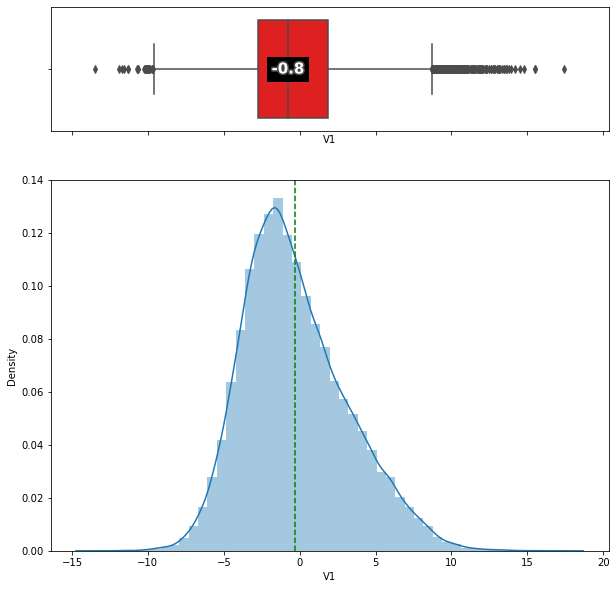

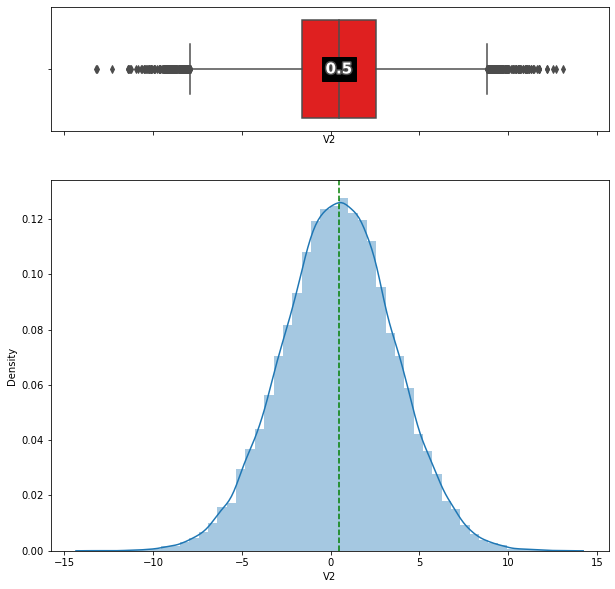

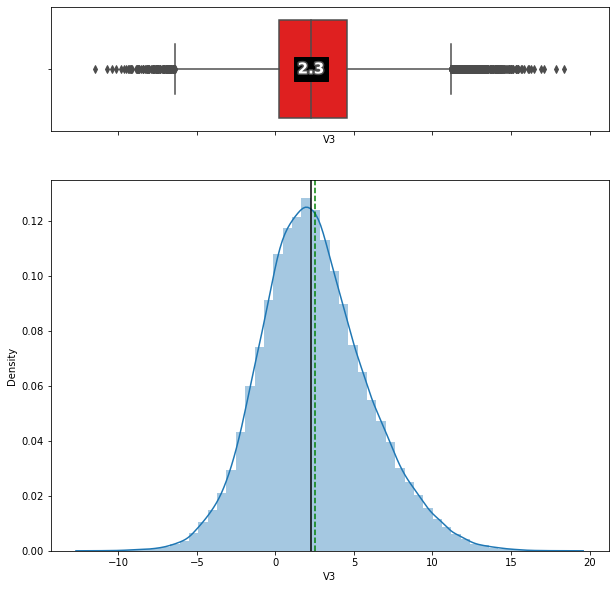

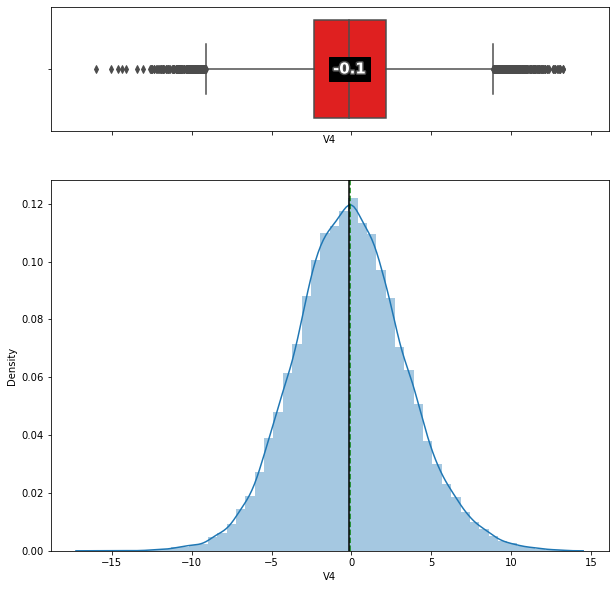

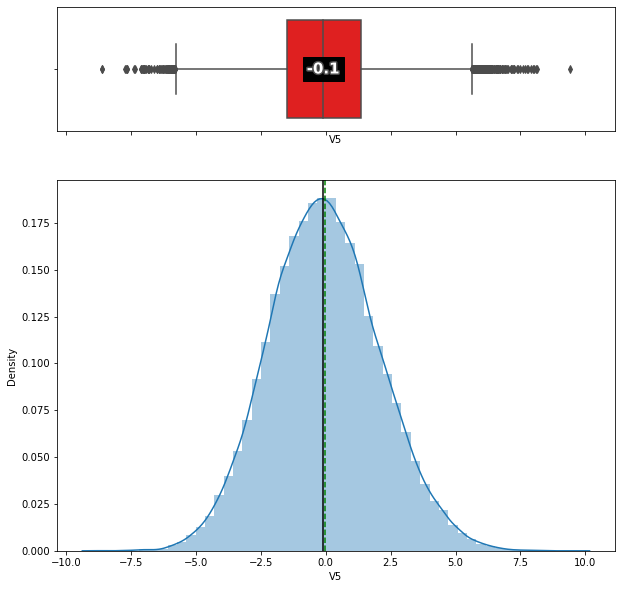

In [13]:
# Let's visualize the data for variables 1 to 5
columns =  ['V1','V2','V3','V4','V5' ]
for col in columns:
    box_and_histogram(data[col])

* Except for V1 most of the other variables 'V2','V3','V4','V5' are near normal distribution

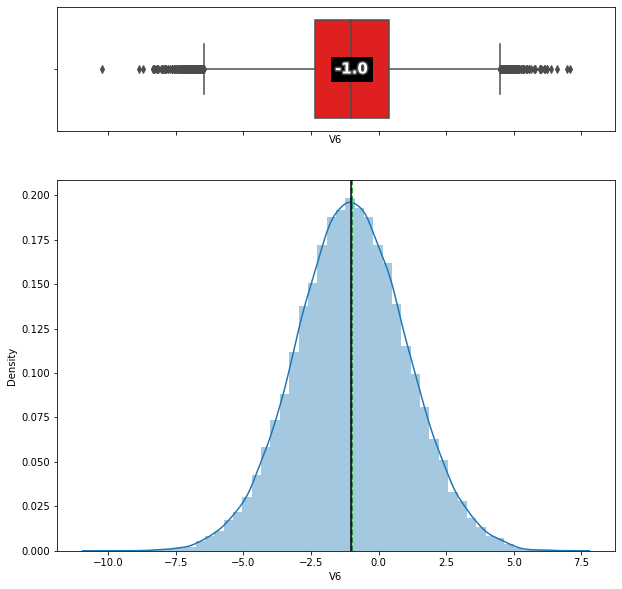

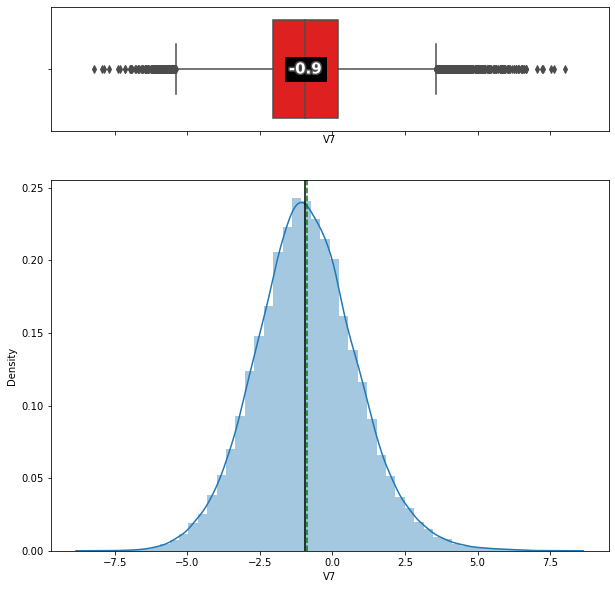

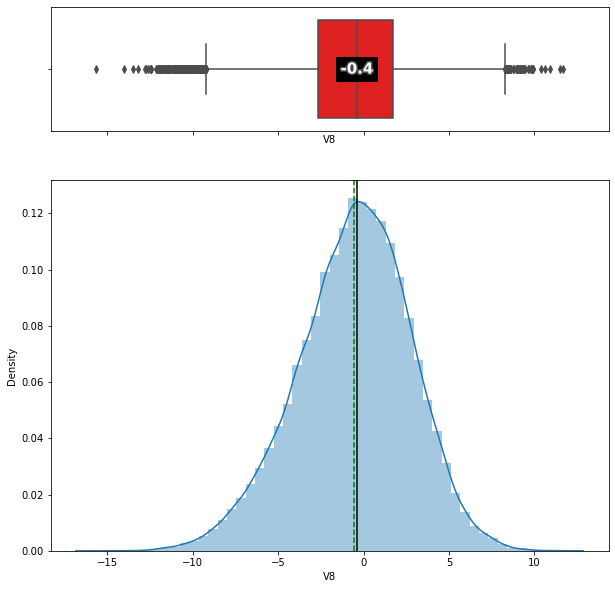

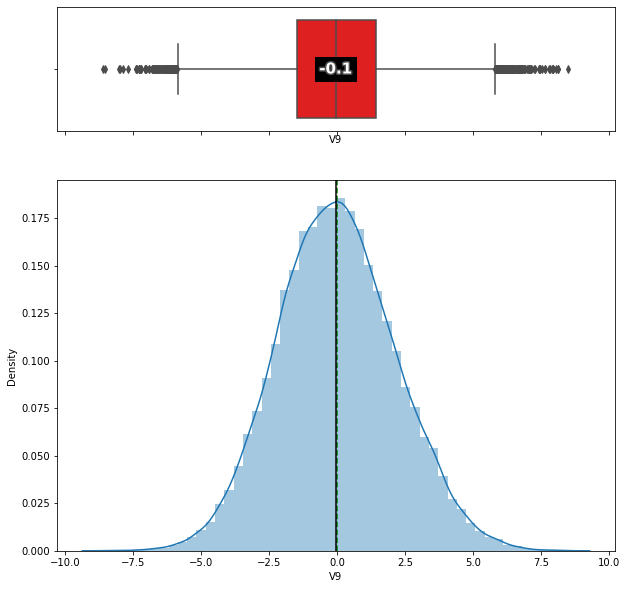

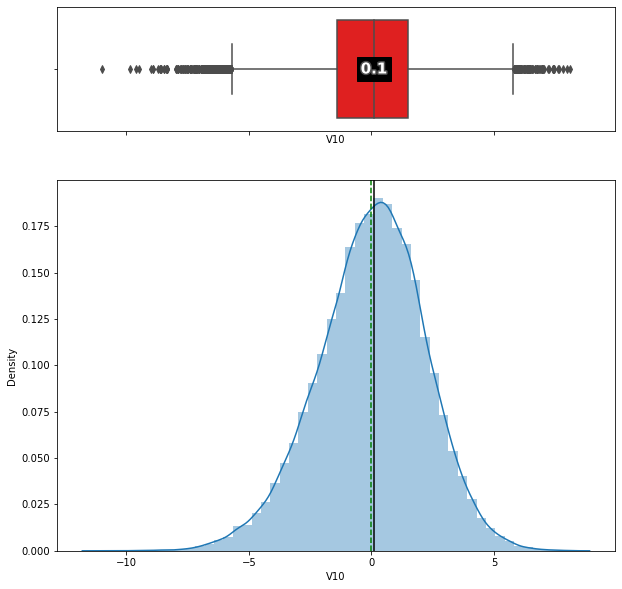

In [14]:
# Let's visualize the data for variables 6 to 10
columns =  ['V6','V7','V8','V9','V10' ]
for col in columns:
    box_and_histogram(data[col])

* Most of the other variables 'V6','V7','V8','V9' and  V10 are near normal distribution

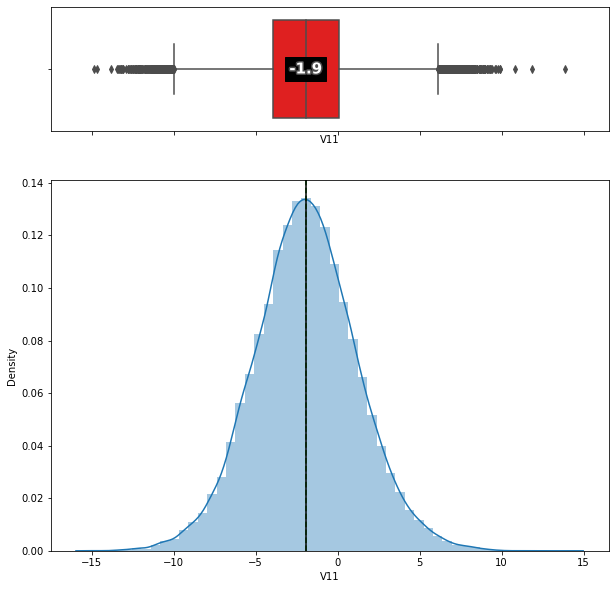

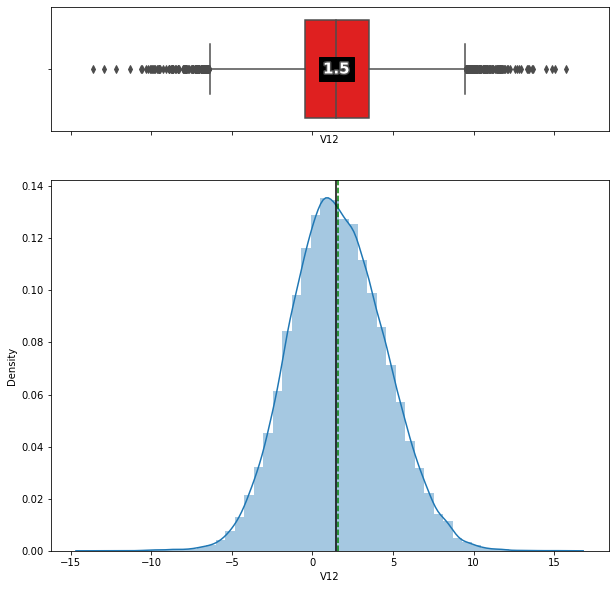

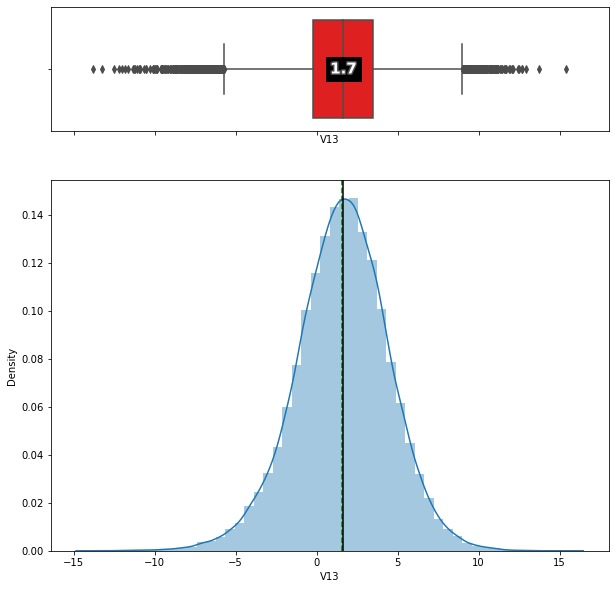

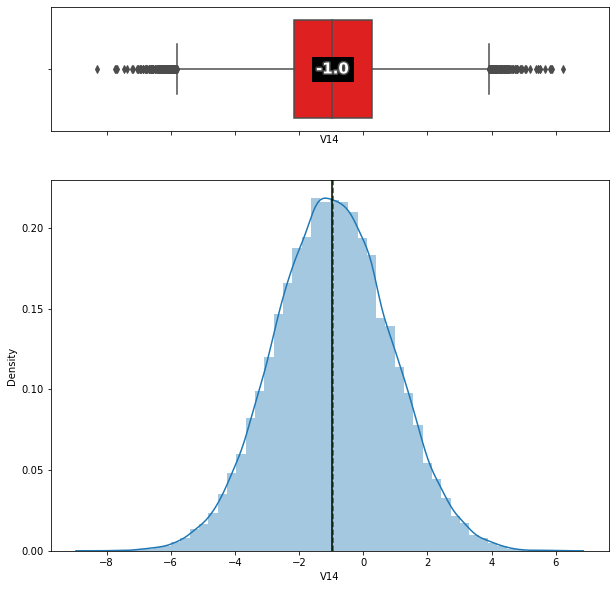

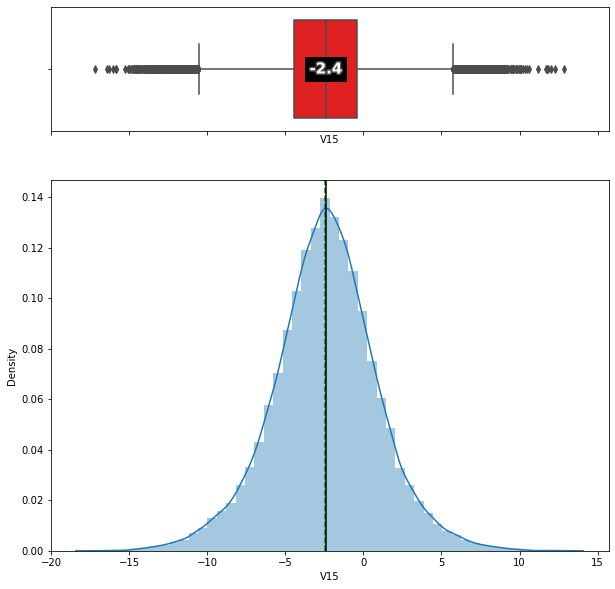

In [15]:
# Let's visualize the data for variables 11 to 15
columns =  ['V11','V12','V13','V14','V15' ]
for col in columns:
    box_and_histogram(data[col])

* Most of the other variables 'V11','V12','V13','V14' and 'V15 are near normal distribution

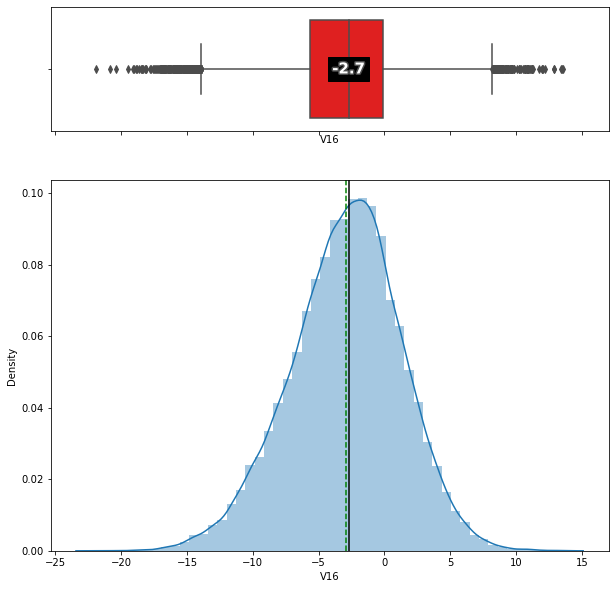

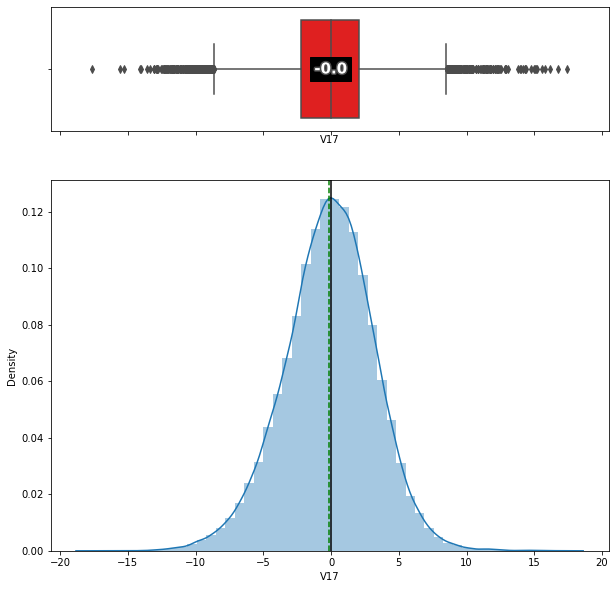

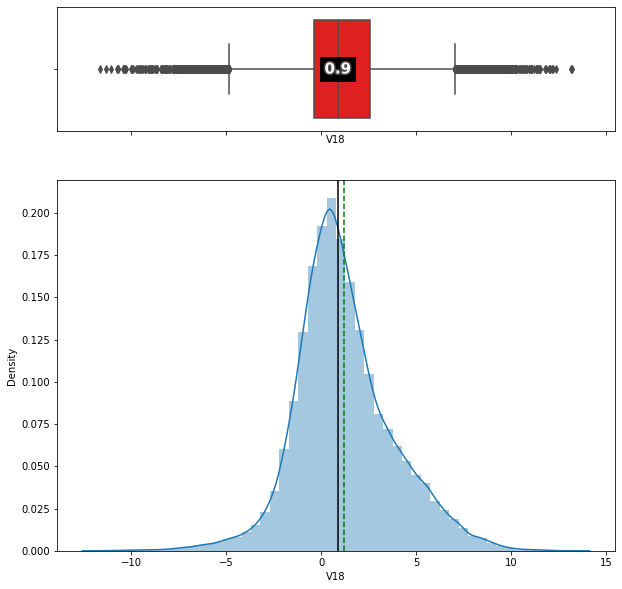

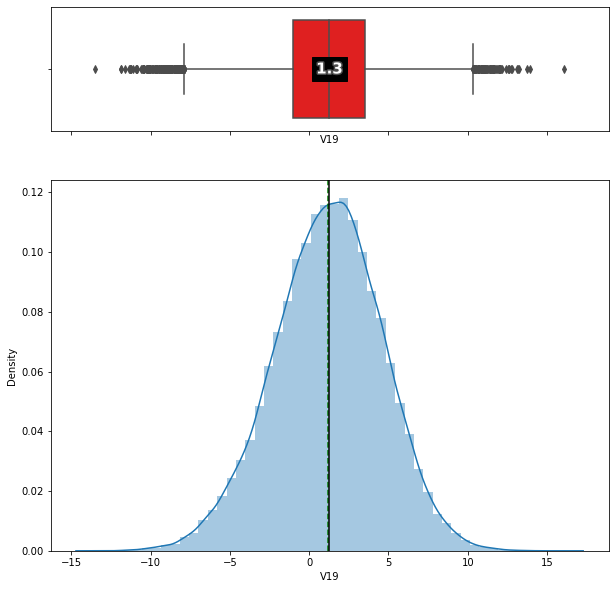

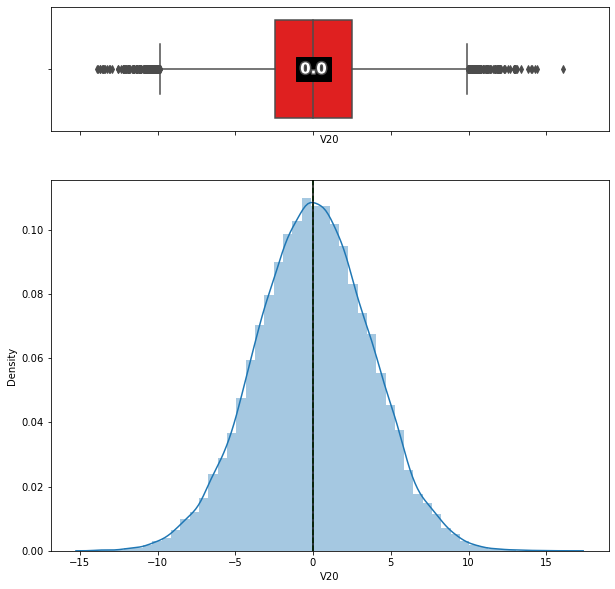

In [16]:
# Let's visualize the data for variables 16 to 20
columns =  ['V16','V17','V18','V19','V20' ]
for col in columns:
    box_and_histogram(data[col])

* Most of the other variables 'V16','V17','V18','V19' and 'V20' are near normal distribution

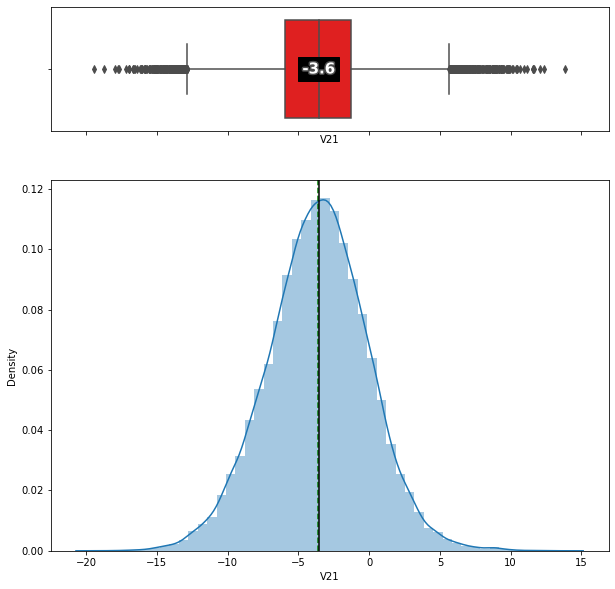

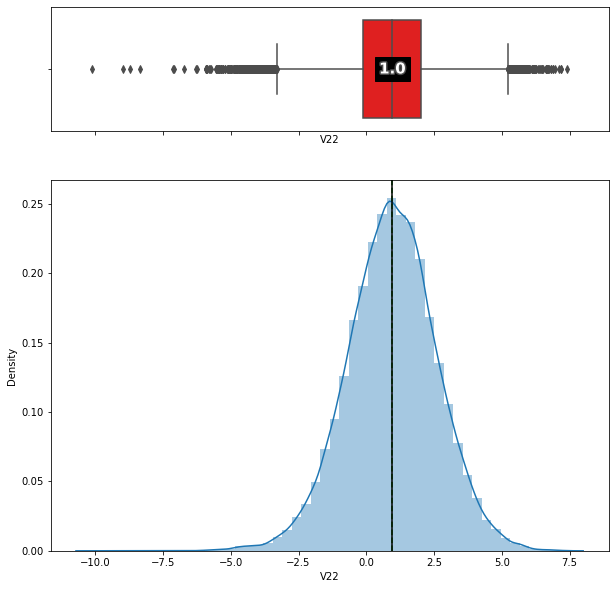

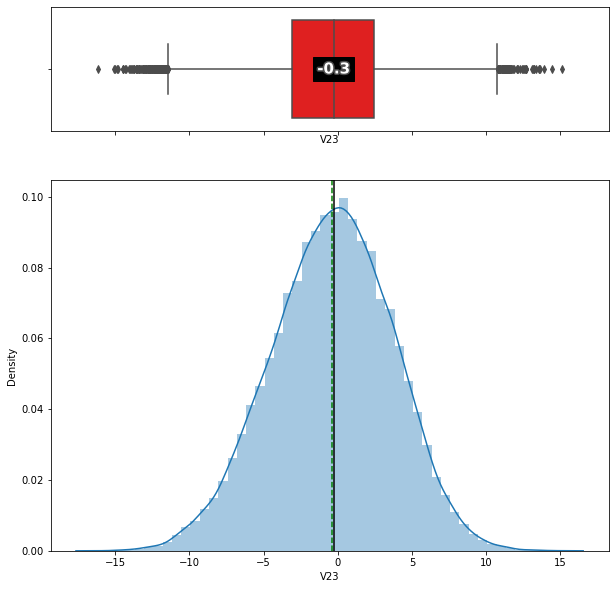

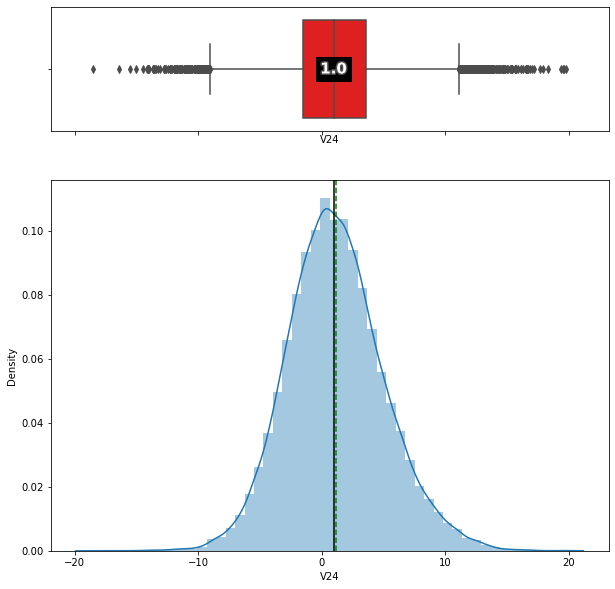

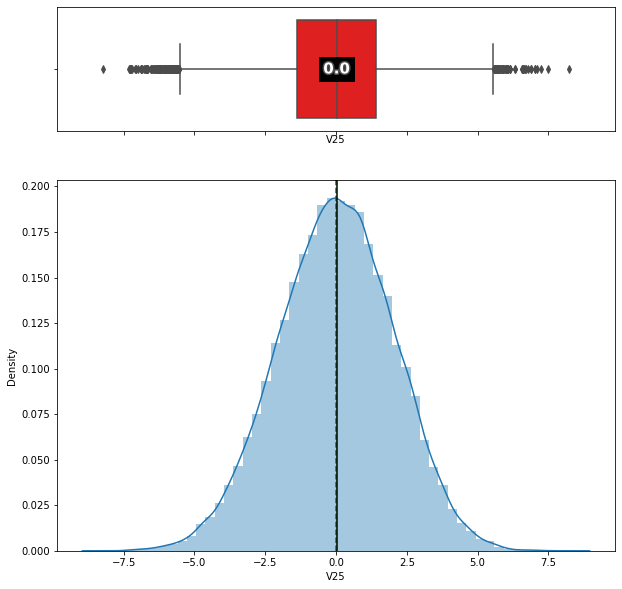

In [17]:
# Let's visualize the data for variables 21 to 25
columns =  ['V21','V22','V23','V24','V25' ]
for col in columns:
    box_and_histogram(data[col])

* Most of the other variables 'V21','V23','V24' and 'V25' are near normal distribution except for V22 which is left skewed

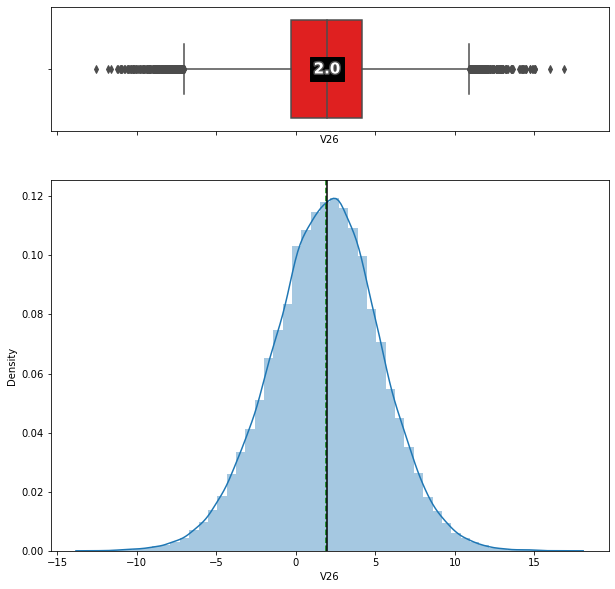

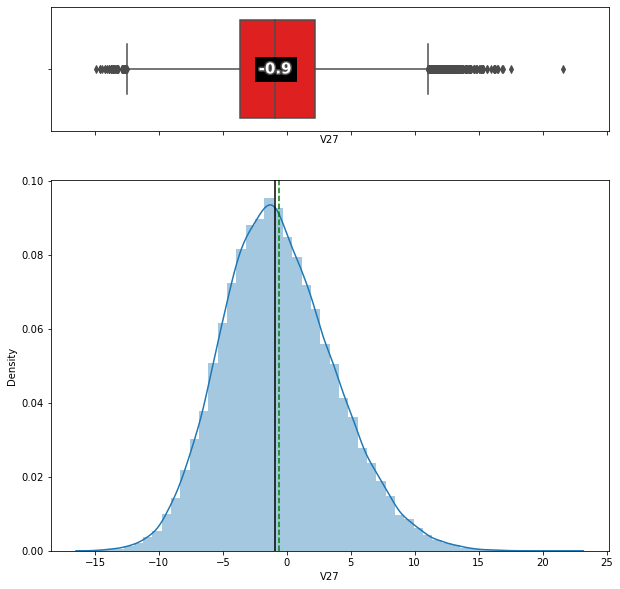

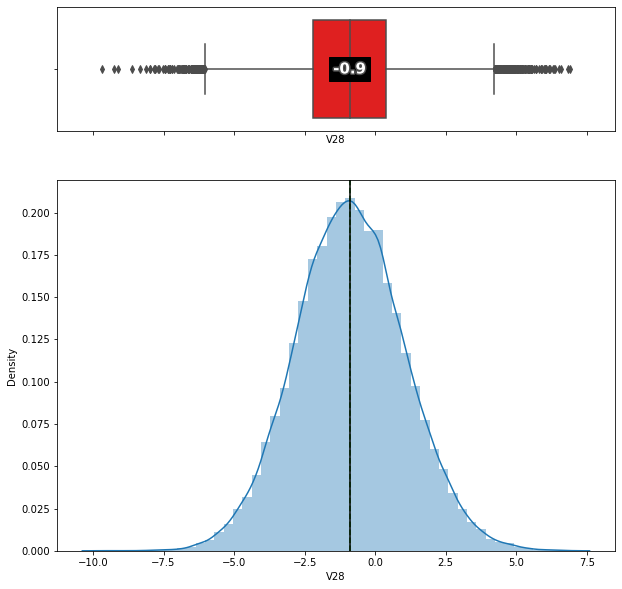

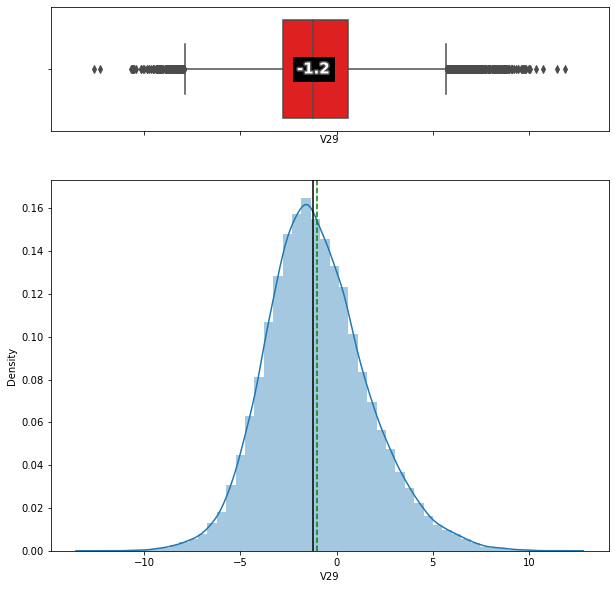

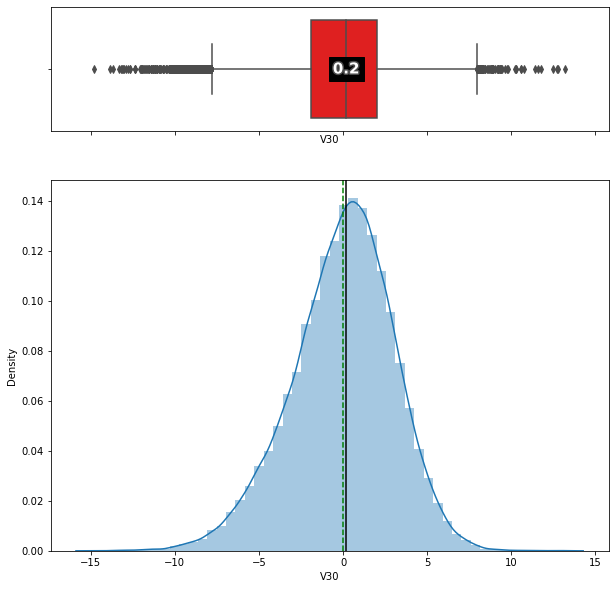

In [18]:
# Let's visualize the data for variables 26 to 30
columns =  ['V26','V27','V28','V29','V30' ]
for col in columns:
    box_and_histogram(data[col])

* Most of the other variables 'V26','V27','V28','V29' and 'V30'  are near normal distribution

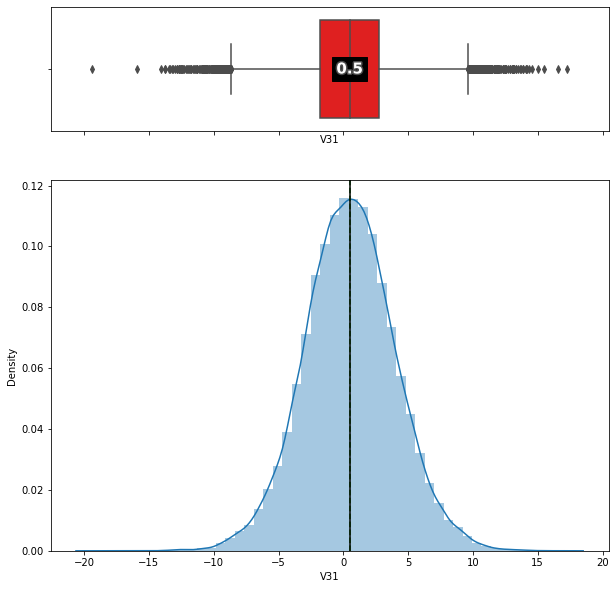

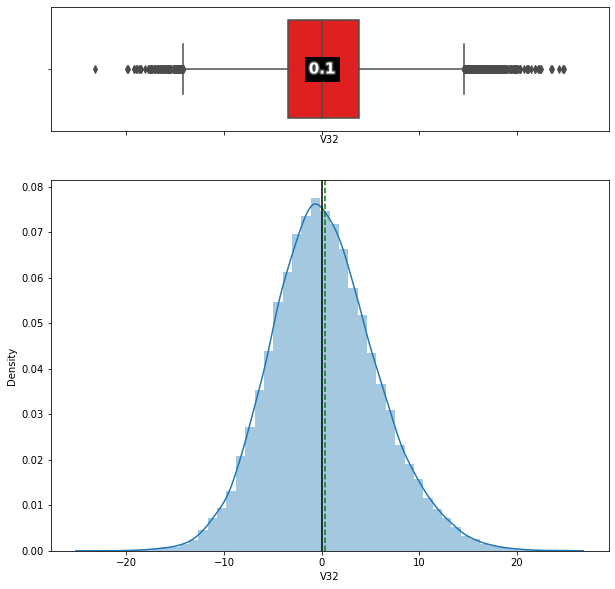

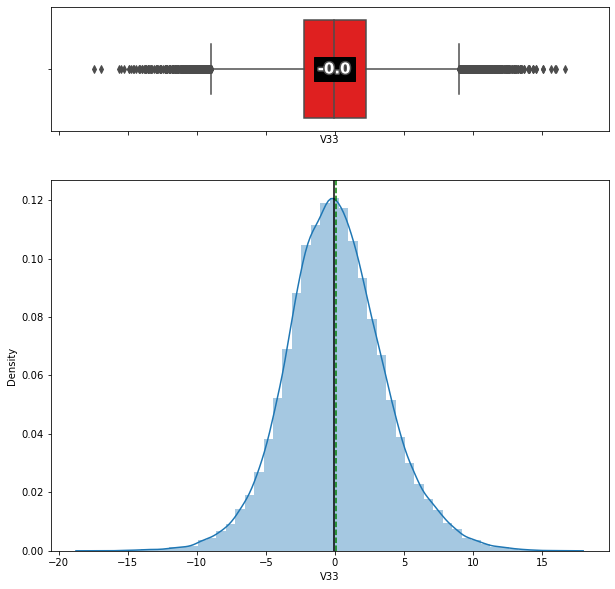

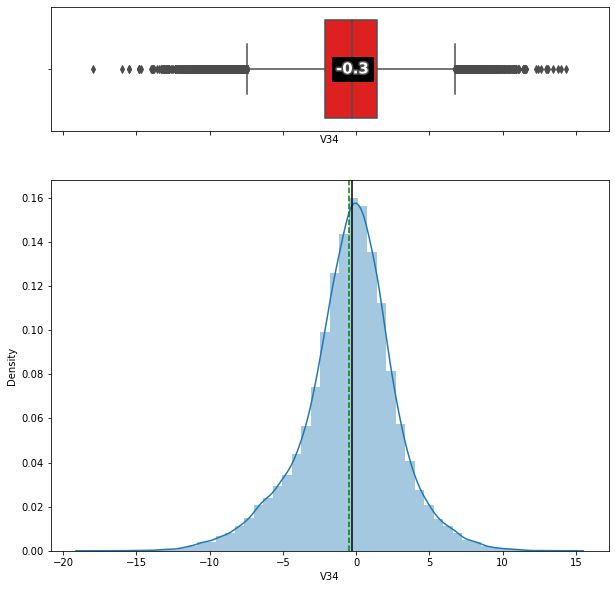

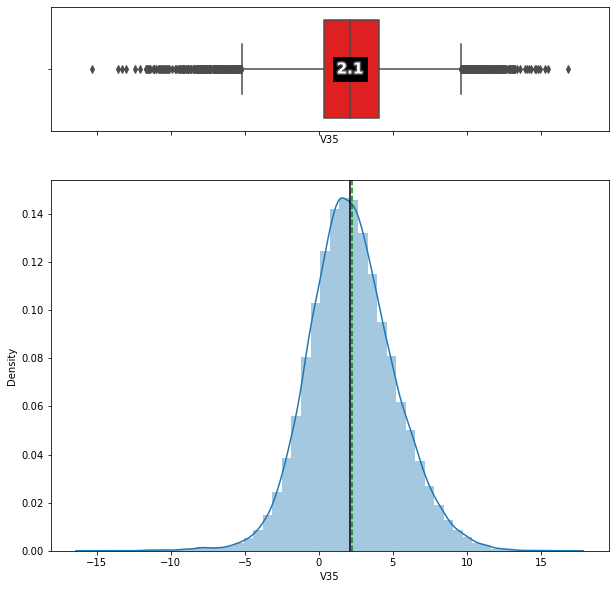

In [19]:
# Let's visualize the data for variables 31 to 35
columns =  ['V31','V32','V33','V34','V35' ]
for col in columns:
    box_and_histogram(data[col])

* Most of the other variables 'V31','V32','V33','V34' and 'V35' are near normal distribution

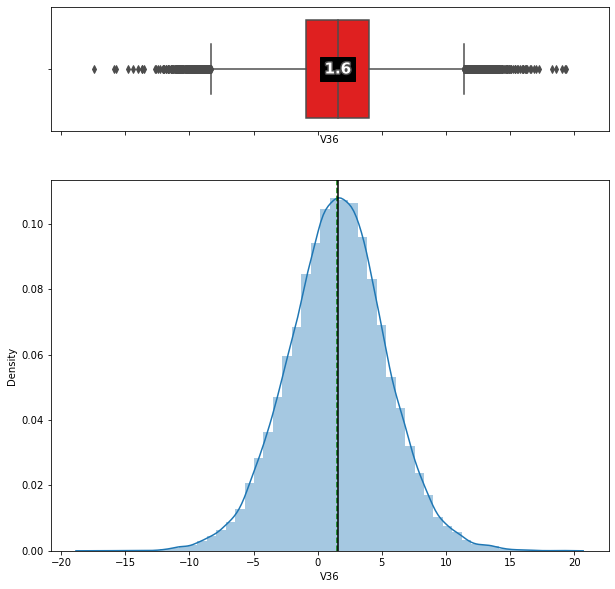

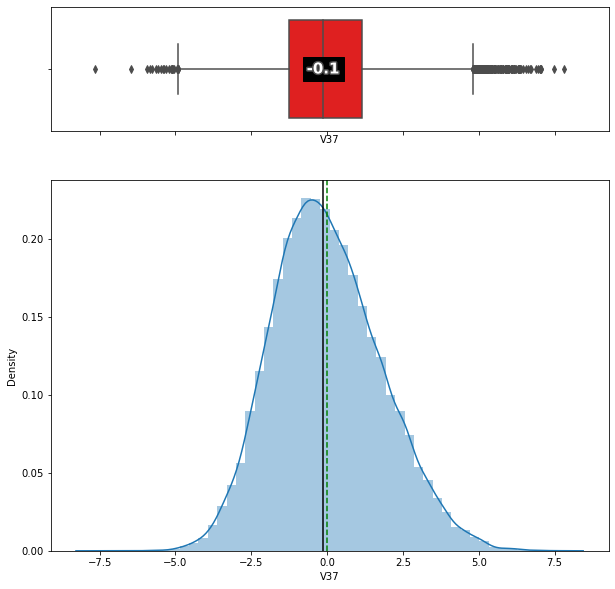

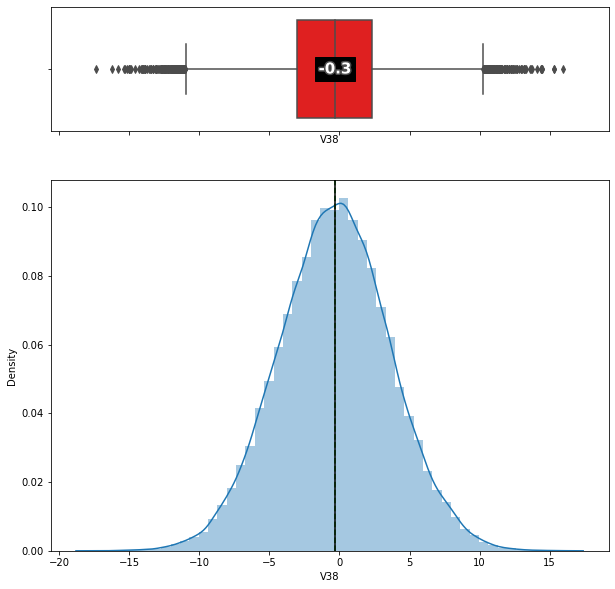

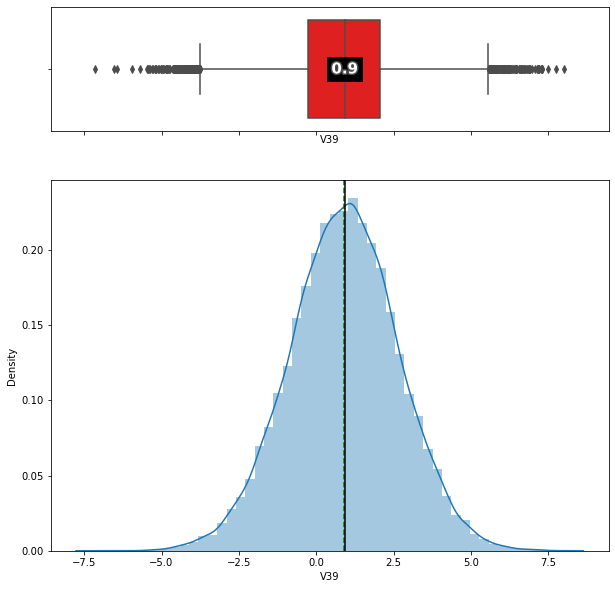

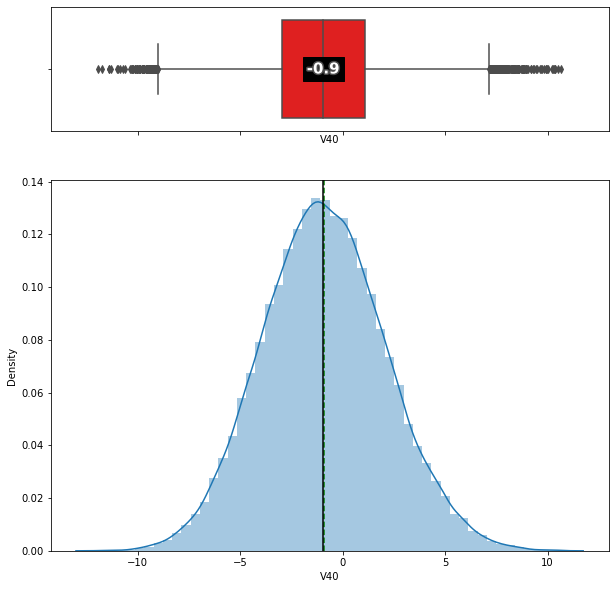

In [20]:
# Let's visualize the data for variables 36 to 40
columns =  ['V36','V37','V38','V39','V40' ]
for col in columns:
    box_and_histogram(data[col])

* Most of the other variables 'V36','V37','V38','V39' and 'V40'are near normal distribution

# Bivariate Analysis

In [56]:
cols=data.loc[:,data.columns!="Target"].columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40'],
      dtype='object')

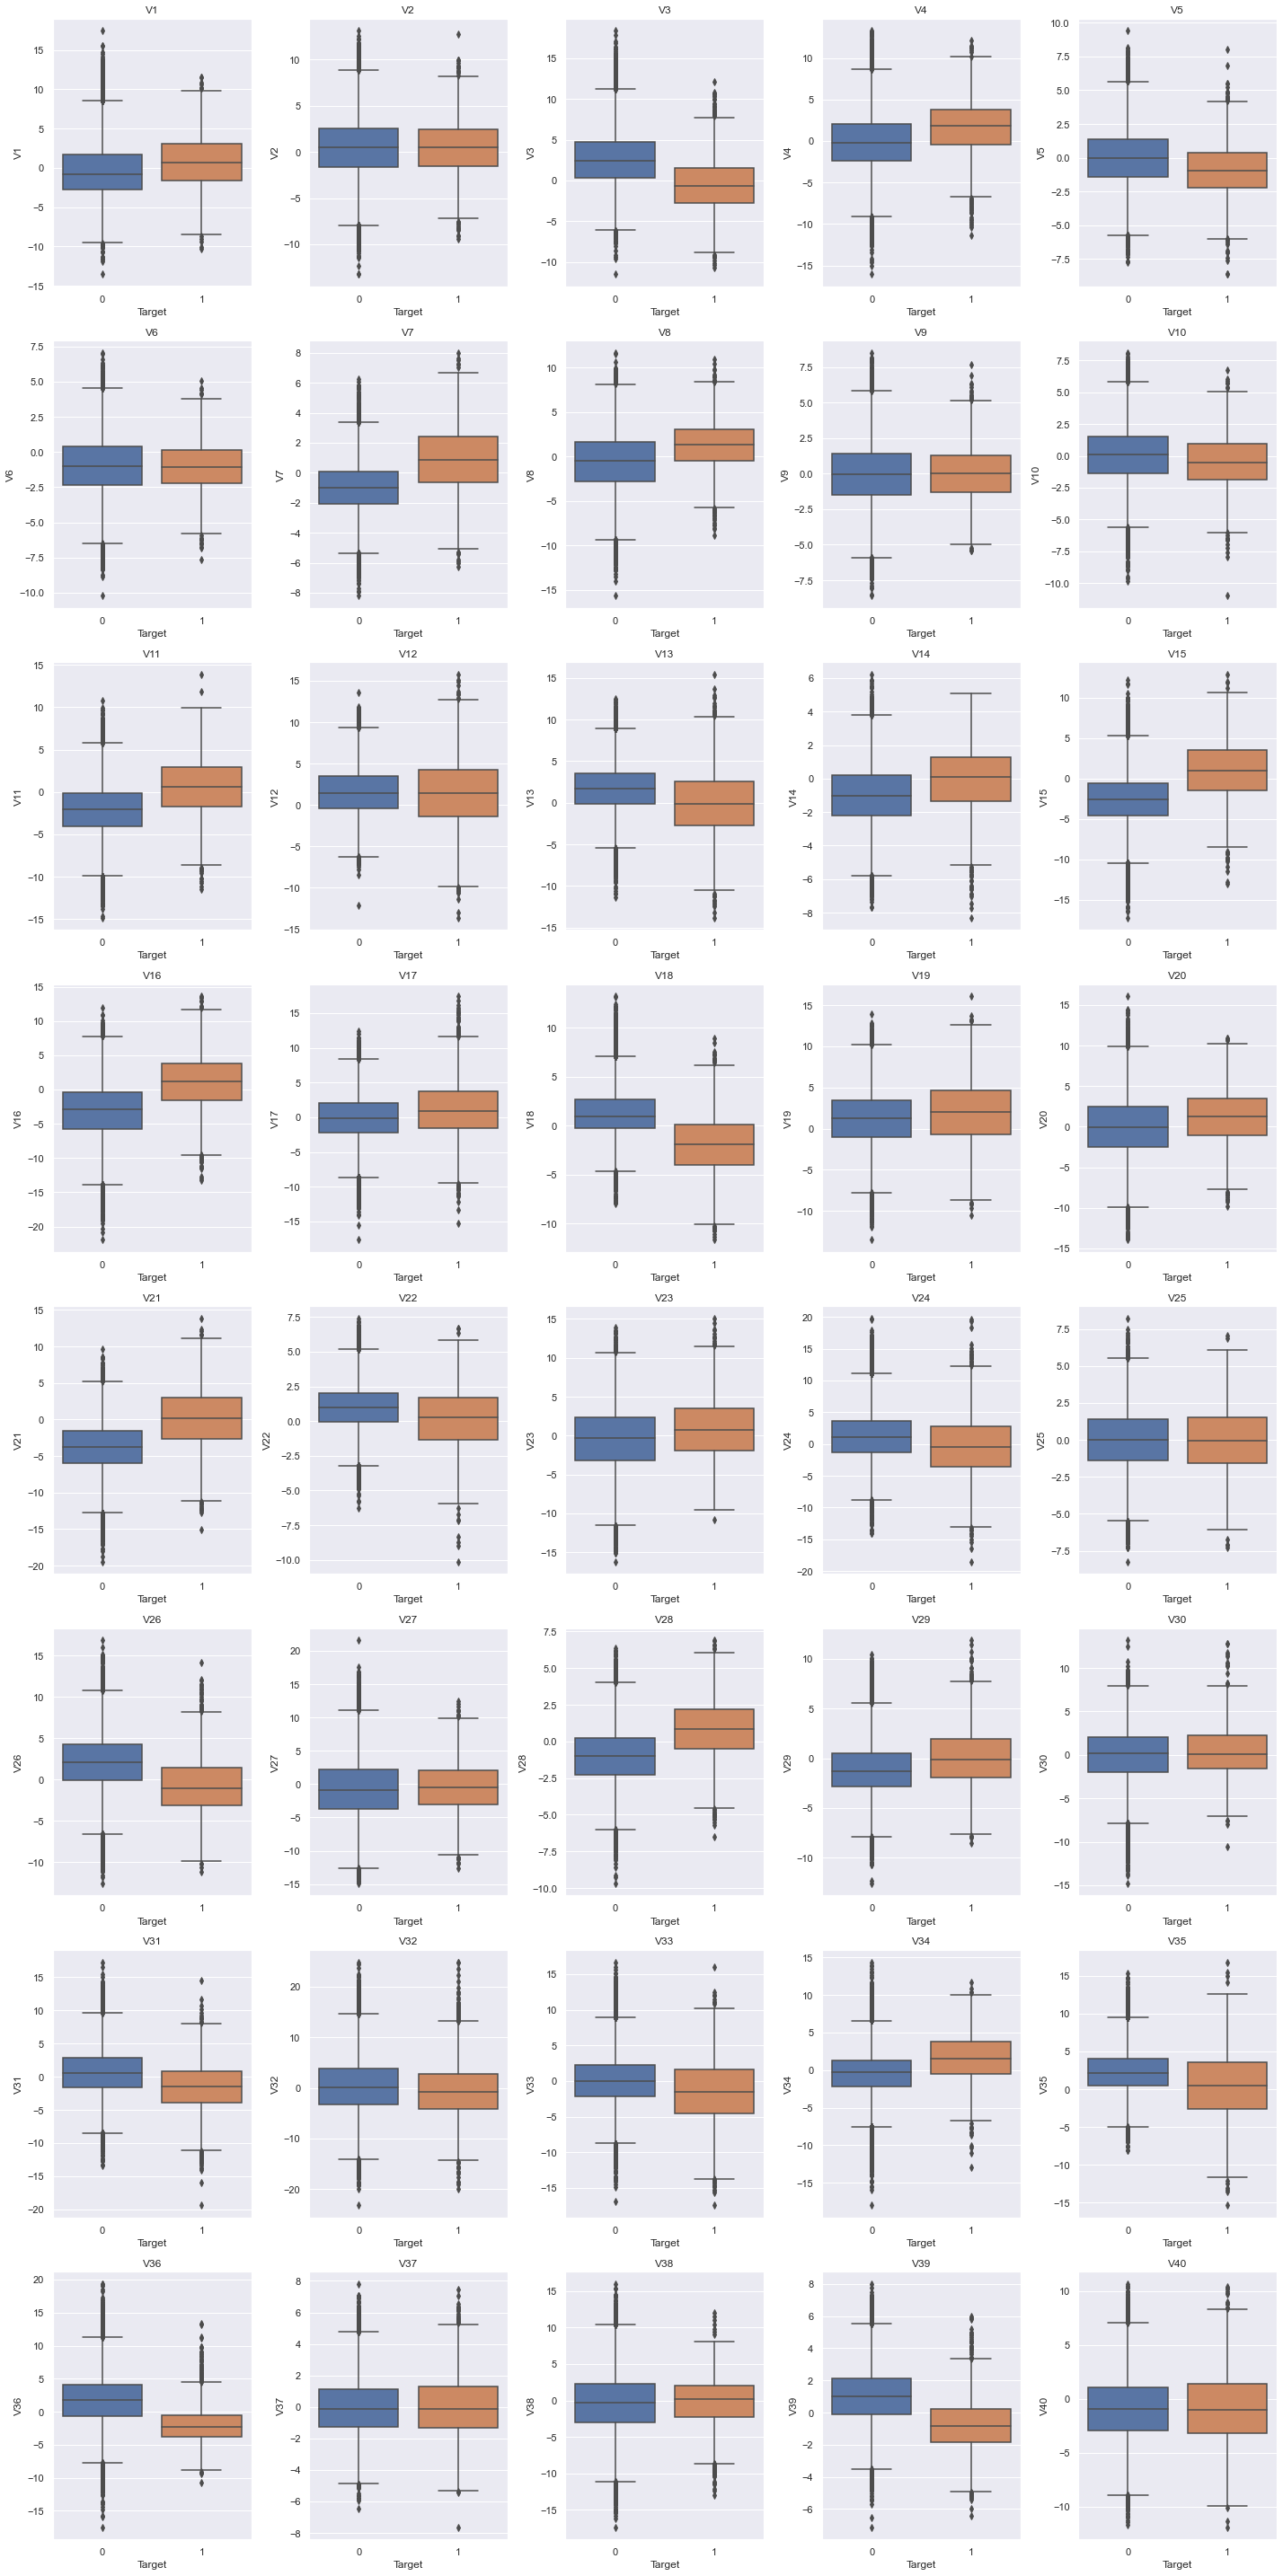

In [60]:

plt.figure(figsize=(20, 40))

for i, variable in enumerate(cols):
    plt.subplot(8, 5, i + 1)
    sns.boxplot(data["Target"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Most of the variables have outliers, and there is no specific pattern between the two classes.

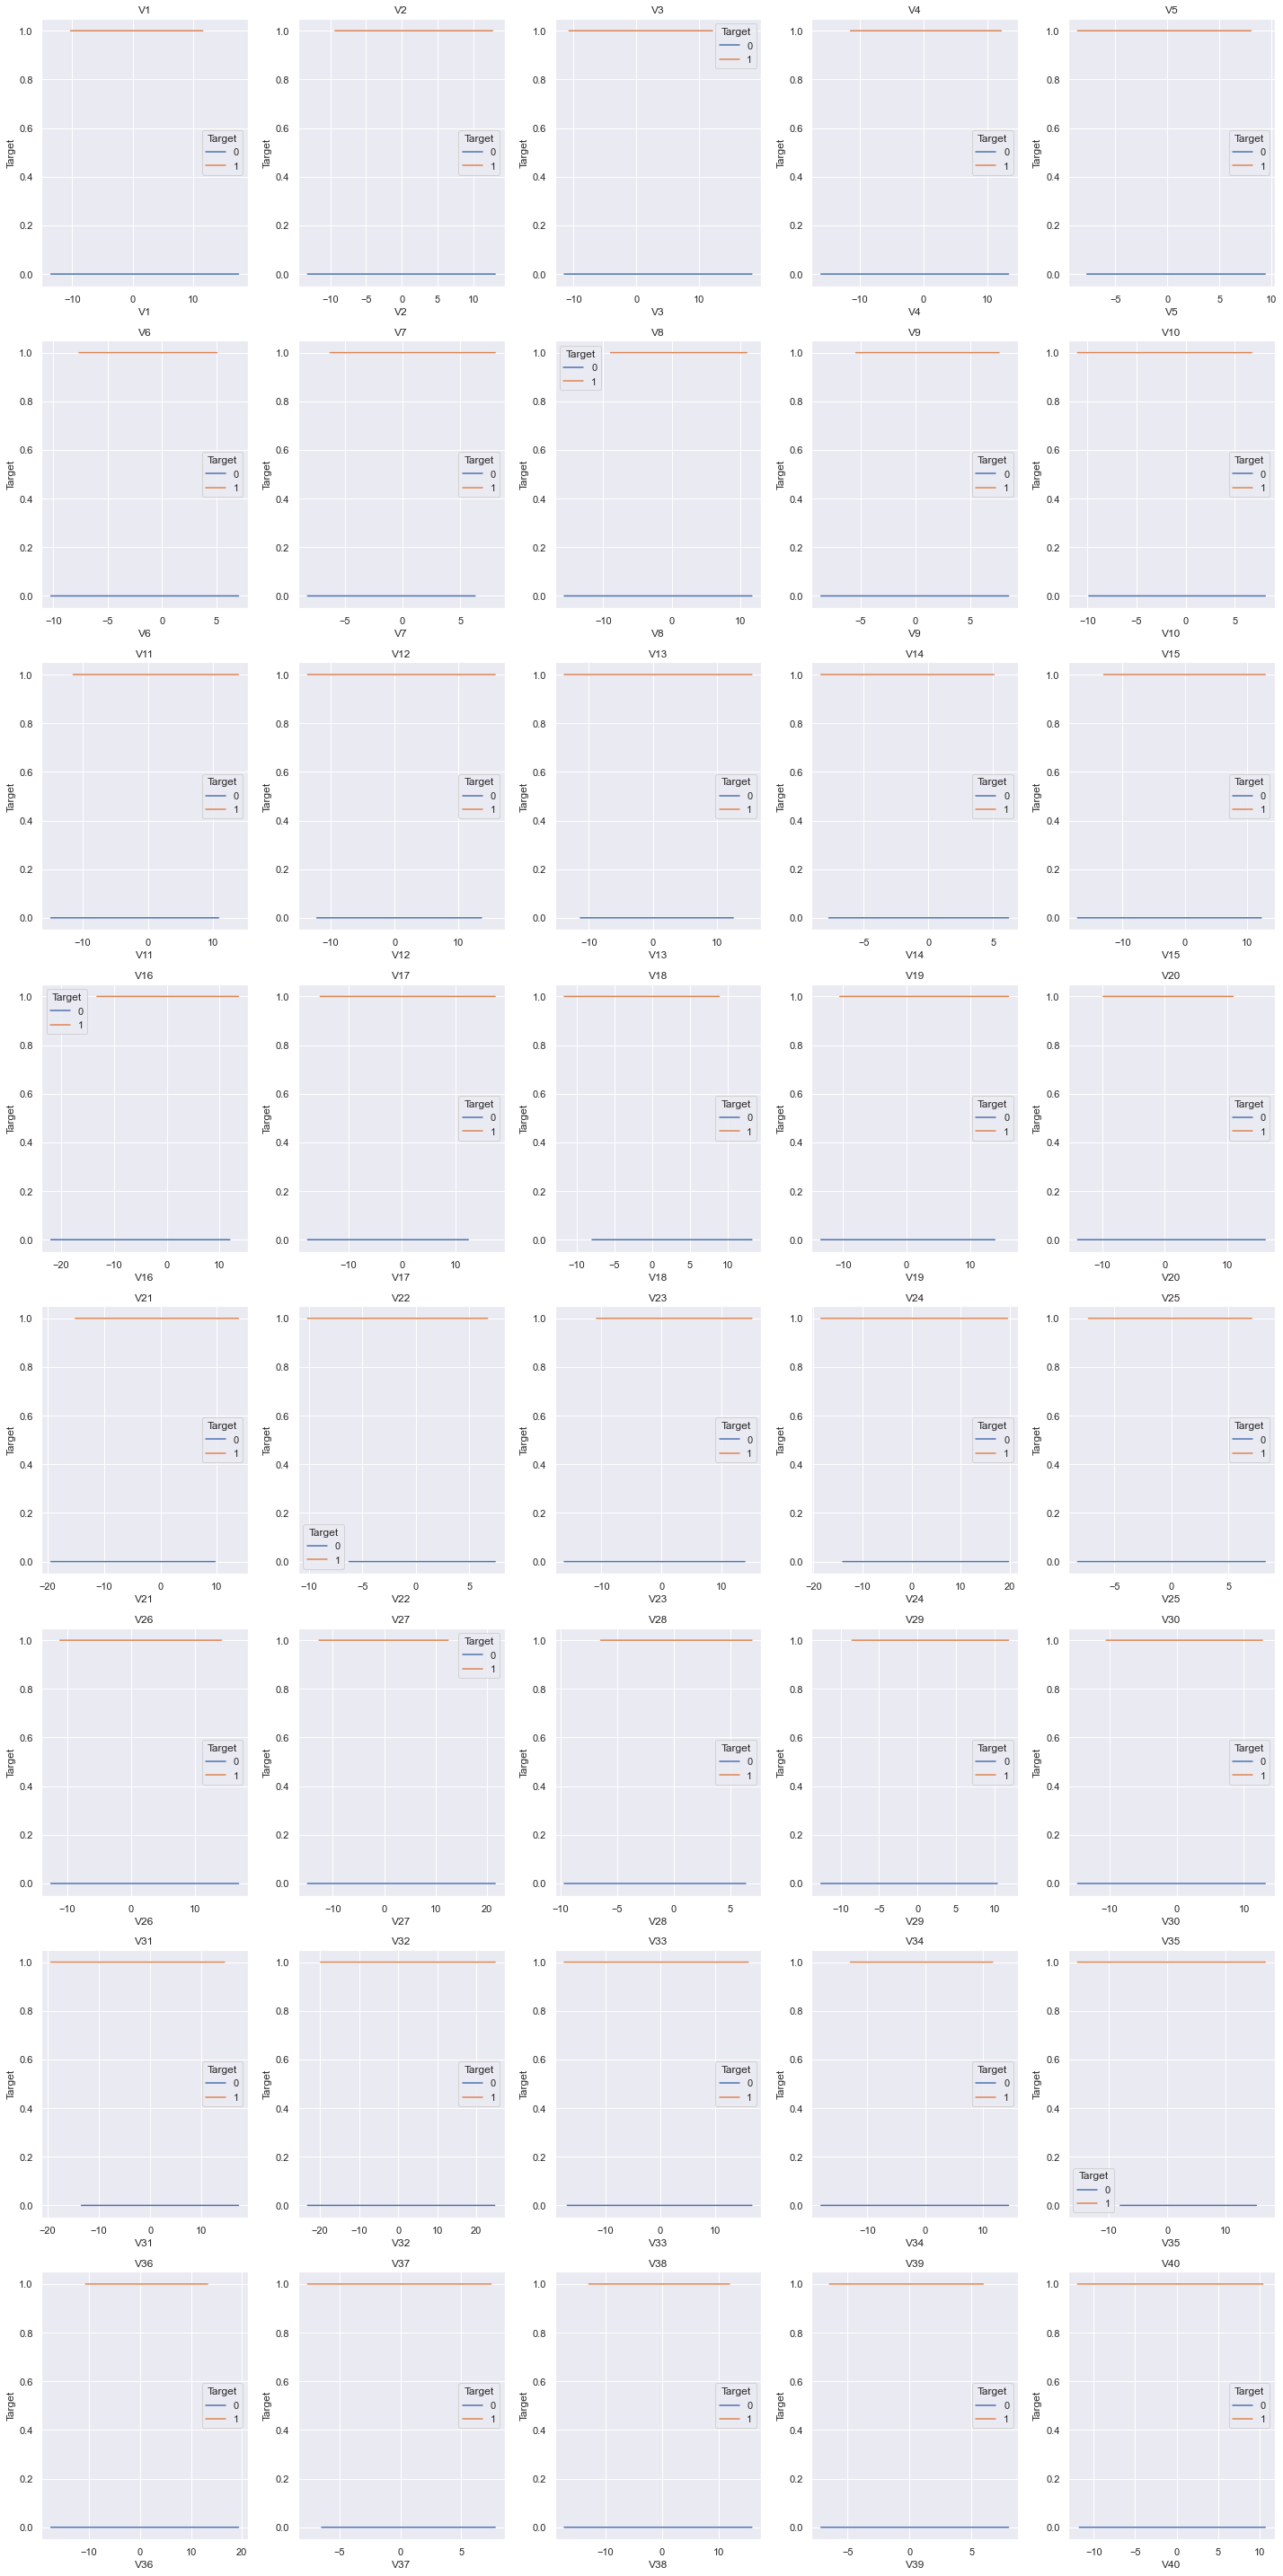

In [64]:

plt.figure(figsize=(20, 40))

for i, variable in enumerate(cols):
    plt.subplot(8, 5, i + 1)
    sns.lineplot(y=data["Target"], x=data[variable] ,hue=data['Target'], ci=None)
    plt.tight_layout()
    plt.title(variable)
plt.show()    

* There is no specific pattern between the two classes.

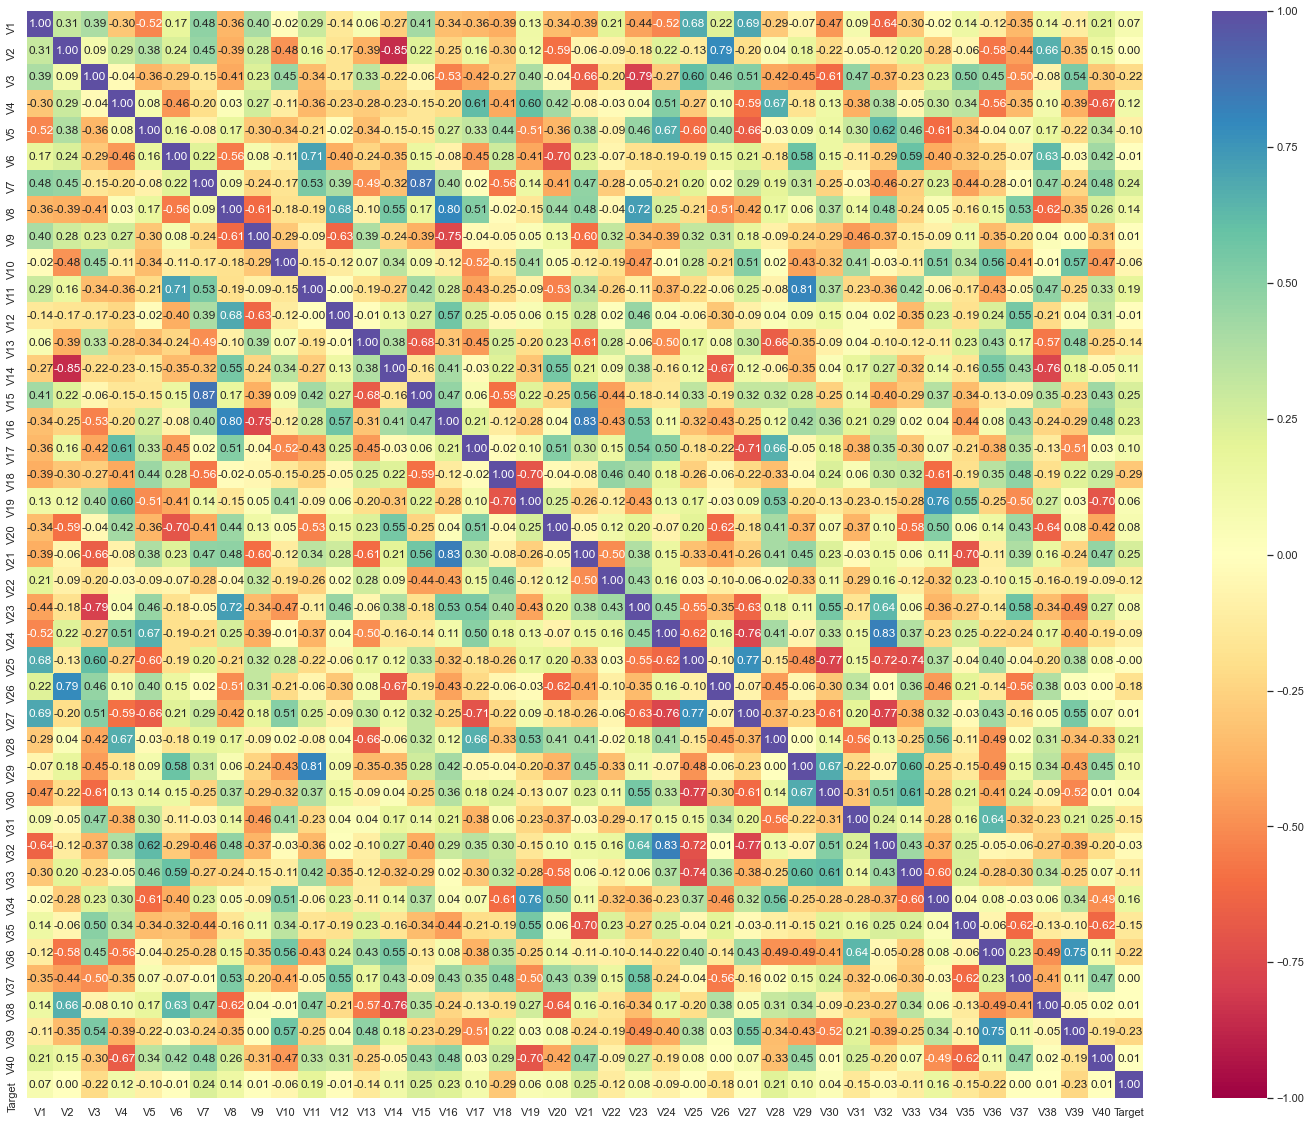

In [22]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no specific correlation of dependent variables w.r.t to Target variable.
* There are some variable that have strong positive and negative correlation.

## Data Pre-processing

#### Missing value Treatment

In [26]:
missing_data = data[data.isnull().any(axis=1)]


In [29]:
missing_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
179,NaN,-3.961403,2.787804,-4.712526,-3.007329,-1.541245,-0.881148,1.476656,0.574700,-1.100884,-1.847500,4.540851,4.489899,0.709830,-2.137588,-2.025606,0.135720,2.791922,-1.166851,4.870138,-3.923793,1.492618,-0.173071,-6.470502,3.008428,-3.133608,3.956271,-1.898191,-0.642024,-0.537602,-1.875548,-8.326069,-5.140552,1.121314,-0.305907,5.315007,3.750044,-5.631174,2.372485,2.195956,0
273,8.340257,NaN,4.701014,-6.210458,-3.452383,1.470407,1.363145,-3.737388,2.563769,0.580317,5.224782,-1.100279,6.722174,0.108789,-0.147561,-2.254103,-9.812704,-2.557279,-1.523474,-5.423774,-5.215212,-0.193827,-5.445650,-10.165518,2.283469,4.110351,10.904055,-5.266057,0.344776,-2.668169,2.833545,-9.074177,0.302138,-1.629747,1.621417,1.755205,-1.708377,-1.411025,1.290293,0.752315,0
1245,-2.048681,NaN,-1.623885,-3.324224,0.152256,0.600157,-1.812802,0.852194,-1.522600,0.211071,-0.459977,2.379694,1.676241,0.529289,-3.767787,-1.095793,-0.785049,4.855301,-1.960680,0.046844,-2.195123,2.567045,3.987672,2.067719,-1.311846,-2.227351,-1.315420,-0.934344,0.535158,3.590032,-0.471473,3.264218,2.379064,-2.457084,1.719365,2.537010,1.701780,-1.434535,0.597365,0.739238,0
1380,-5.418573,NaN,-3.572559,5.968870,-0.205538,-1.109785,-0.932011,3.405683,-1.115739,0.522278,-0.237106,-1.564628,-4.009767,1.379675,1.645199,4.632539,4.977622,-2.015693,2.710159,6.348299,5.534624,-2.107946,1.175364,2.906464,-1.503223,-5.756979,-5.847501,4.122799,1.977548,3.739087,-3.099835,4.859093,0.336079,3.993229,-0.140748,-3.344090,0.364732,-1.402871,-1.717696,-2.597330,1
1912,NaN,-4.396035,2.966584,0.295102,0.731237,-1.994700,-3.058456,1.751438,-0.829251,1.678691,-3.877690,-0.523262,3.117887,2.224083,-3.885601,1.687679,-0.578267,1.532526,-1.483454,4.780401,0.522266,-2.495555,-1.826535,-0.986531,-0.206230,-0.713276,-1.621114,-1.308794,-1.380073,-0.199121,3.110573,3.066807,0.169947,1.215512,-0.164512,6.554772,1.116389,-5.987598,2.751352,-1.781519,0
2592,-4.319088,NaN,2.843283,2.945775,3.595187,0.281369,-0.896436,-3.177737,-2.770721,1.762175,-1.028361,1.305554,-1.669878,-3.953334,-3.296903,-3.628615,-1.775791,0.984566,4.450028,-7.065080,-3.236503,0.027602,-1.015812,10.481567,-4.444116,7.823805,-6.029542,-0.253706,0.202040,2.016165,3.365177,9.047712,7.782101,-1.792136,5.452533,-0.715179,-3.376629,7.879568,0.763107,-3.694618,0
4520,-3.760658,NaN,0.194954,-1.637958,1.261479,-1.573947,-3.685700,1.575651,-0.309823,-0.137656,-4.495353,1.816832,5.029424,1.437108,-8.108689,-2.802929,-0.186850,5.801223,-3.025006,2.018854,-5.082972,3.032960,5.197027,3.117241,-1.580460,0.259425,-3.535269,-2.269980,-2.474176,2.470193,1.162112,7.620821,1.695061,-3.956354,2.707644,4.657387,1.619307,-5.537285,1.246650,-1.162793,0
4535,NaN,-2.290514,5.281270,0.061313,-2.685212,-2.957848,-1.926706,0.586094,0.588523,1.390606,-2.393746,1.518457,4.980041,0.476893,-3.904766,-3.755668,-2.423004,-0.395431,3.052598,2.336750,-7.451835,1.437825,-1.472597,-1.057866,1.040043,0.968170,1.961925,-2.177968,-2.257775,0.458950,1.933139,0.912012,-1.003690,0.486942,6.282024,3.008357,-0.929962,-5.314752,0.854975,-3.397366,0
4993,NaN,-4.064771,2.664544,0.558965,-2.042545,-2.631083,-2.490838,2.443172,-1.374747,1.323602,-2.383205,2.849271,2.432142,0.510173,-3.615126,-1.671053,0.131941,1.302810,3.201164,3.966235,-4.931732,1.503287,0.929219,2.002754,-0.300393,-2.239765,-1.686891,-0.487229,-0.385455,3.638871,0.487030,3.687370,0.453439,0.926712,6.125896,2.568266,0.309537,-4.769939,0.352315,-2.787734,0
5071,-1.430888,NaN,0.659576,-2.876402,1.150137,-0.785760,-1.560174,2.898635,-2.346989,-0.217607,-1.131122,2.931200,2.053438,0.375193,-3.122665,1.321348,-1.052983,3.187626,-2.288253,-1.314396,-2.461230,1.291901,3.693753,3.002806,-1.522996,0.903917,-2.649923,-2.502205,0.678484,3.294856,3.915422,6.279266,3.323914,-4.047760,3.119220,3.336260,0.603524,-3.781725,-0.157478,1.503298,0


In [65]:
missing_data.shape

(85, 41)

From the count of the missing data, V1 and V2, the missing data pattern on V1=46 and V2=39 is independent of each other.

#### Since most of the variables are near normal distribution  we can use the median imputer to replace missing values

In [142]:
final_data_for_model = data.copy()

In [484]:
X = final_data_for_model.drop("Target", axis=1)  # Features
y = final_data_for_model["Target"] #Label (Target Variable)


In [144]:
# Splitting data into training and validation set:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(28000, 40) (12000, 40)
(28000,) (12000,)


In [145]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])

Number of rows in train data = 28000
Number of rows in validation data = 12000


In [399]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_val.value_counts(normalize=True))

Percentage of classes in training set:
0    0.944893
1    0.055107
Name: Target, dtype: float64
Percentage of classes in test set:
0    0.946333
1    0.053667
Name: Target, dtype: float64


* There is a imbalance in the data between the classes

### Test data

In [340]:
X_test = data_test.drop("Target", axis=1)  # Features
y_test = data_test["Target"] #Label (Target Variable)

####  Impute missing values on training and validation data

* As most of the variables are Normal distribution we can use "median" filler for missing data

In [401]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)

####  Impute missing values on test data

In [369]:
X_test = imputer.transform(X_test)

## Model evaluation criterion

### 3 types of cost are associated with the provided problem
1. Replacement cost - False Negatives - Predicting no failure, while there will be a failure
2. Inspection cost - False Positives - Predicting failure, while there is no failure 
3. Repair cost - True Positives - Predicting failure correctly

### How to reduce the overall cost?
* We need to create a customized metric, that can help to bring down the overall cost.
* The cost associated with any model = TP * 15000 + FP * 5000 + FN * 40000
* And the minimum possible cost will be when, the model will be able to identify all failures, in that case, the cost will be (TP + FN) * 15000
* So, we will try to maximize `Minimum cost/Cost associated with model`

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [200]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (TP + FN) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = Min_Cost / Cost  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

In [201]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Defining scorer to be used for hyperparameter tuning**

- Every prediction of a classification model will be either a TP, FP, FN or TN.
- Till now at most of the places we wanted to reduce False negatives and hence we tried to maximize "Recall".
- To maximize Recall, we used Recall as a **scorer** in hyperparameter tuning.
- Here, we not only want to minimize false negatives but also false positives and we are also given the costs associated with each type of prediction.
- So, overall we want to reduce the maintenance cost which is: `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
- In simple language, we can say that we are assigning different weightage to the different types of predictions.
- Do we have any such metric which can help us minimize the maintenance cost? i.e., help us reduce FP and FN as per the weightage - We don't have any such inbuilt metric.
- In sklearn, we can define **custom scorers** also as per our need.
- For this classification problem, we need to reduce the maintenance cost, which can be reiterated as:
  - Minimize (maintenance cost)
  - Maximize (1/maintenance cost)
  - Maximize (minimum possible maintenance cost/maintenance cost)
- Eventually, all 3 metrics will do the same work in the backend and the only difference will be in the scale of the values of the metric.

- The metric provided in the next cell is to `maximize(minimum possible maintenance cost/maintenance cost)`
- You can modify the metric as per convenience and use it further to tune the models.

In [202]:
# defining metric to be used for optimization and with cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

## Model Building with Original data

#### Logistic Regression (with Sklearn library)

In [203]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)
lg

LogisticRegression(random_state=1, solver='newton-cg')

Training performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.966214  0.473752   0.845087  0.607143               0.524651
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9675  0.487578   0.839572  0.616896               0.530478


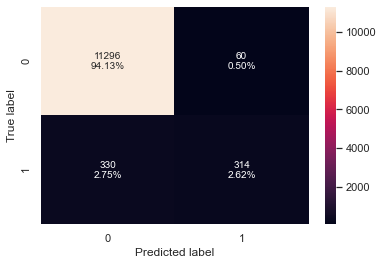

In [403]:
#Calculating different metrics
lg_model_train_perf=model_performance_classification_sklearn(lg, X_train, y_train)
print("Training performance:\n",lg_model_train_perf)
lg_model_val_perf=model_performance_classification_sklearn(lg, X_val, y_val)
print("Validation performance:\n",lg_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(lg, X_val, y_val)

- In general the model is generalizing well.

#### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.971083  0.768634   0.714286  0.740464                  0.672


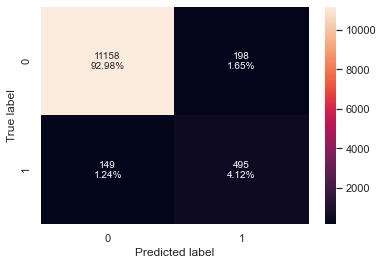

In [162]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_val_perf=model_performance_classification_sklearn(d_tree,X_val,y_val)
print("Validation performance:\n",dtree_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_val, y_val)

* The model is overfitting

#### Random Forest

In [163]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.987583  0.779503   0.986248  0.870772               0.729332


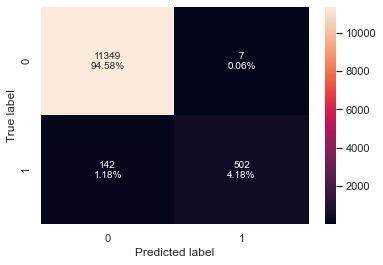

In [164]:
rf_estimator.fit(X_train,y_train)
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_val_perf=model_performance_classification_sklearn(rf_estimator,X_val,y_val)
print("Validation performance:\n",rf_estimator_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_val, y_val)

* The model is overfitting

#### Bagging classifier

In [165]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.997821  0.960467        1.0  0.979835               0.938184
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0   0.98525  0.753106   0.964215  0.845684               0.703825


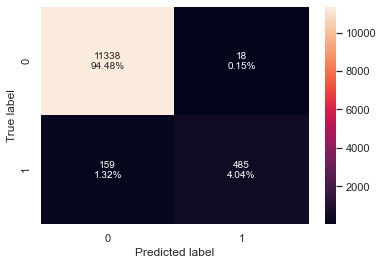

In [166]:
bagging_estimator_train_score=model_performance_classification_sklearn(bagging_estimator,X_train,y_train)
print("Training performance:\n",bagging_estimator_train_score)
bagging_estimator_val_score=model_performance_classification_sklearn(bagging_estimator,X_val,y_val)
print("Validation performance:\n",bagging_estimator_val_score)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator, X_val, y_val)

* The model is not generalizing

#### Model Building - Boosting

#### AdaBoost Classifier

In [167]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.975643  0.624109   0.904225  0.738497               0.606605
Validation performance:
    Accuracy    Recall  Precision       F1  Minimum_Vs_Model_cost
0  0.975667  0.619565   0.894619  0.73211               0.602996


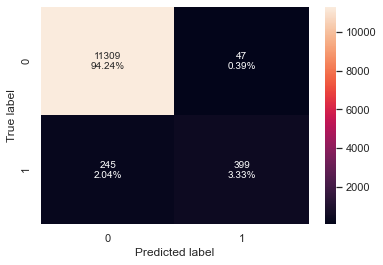

In [168]:
abc_train_score=model_performance_classification_sklearn(abc,X_train,y_train)
print("Training performance:\n",abc_train_score)
abc_val_score=model_performance_classification_sklearn(abc,X_val,y_val)
print("Validation performance:\n",abc_val_score)
#Creating confusion matrix
confusion_matrix_sklearn(abc, X_val, y_val)

* In general the model is generalizing well.

#### Gradient Boosting Classifier

In [169]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.987321  0.786131   0.979806  0.872348               0.734296
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.983917  0.731366   0.959267  0.829956               0.685836


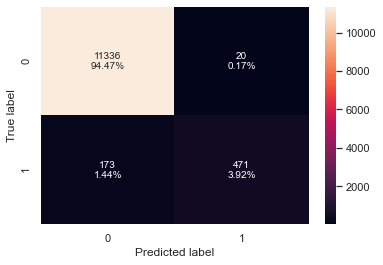

In [170]:
gbc_train_score=model_performance_classification_sklearn(gbc,X_train,y_train)
print("Training performance:\n",gbc_train_score)
gbc_val_score=model_performance_classification_sklearn(gbc,X_val,y_val)
print("Validation performance:\n",gbc_val_score)
#Creating confusion matrix
confusion_matrix_sklearn(gbc, X_val, y_val)

* In general the model is generalizing well.

#### XGBoost Classifier

In [171]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0
Validation performance:
    Accuracy    Recall  Precision       F1  Minimum_Vs_Model_cost
0      0.99  0.829193   0.981618  0.89899               0.775281


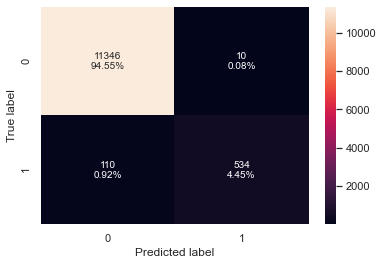

In [407]:
xgb_train_score=model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance:\n",xgb_train_score)
xgb_val_score=model_performance_classification_sklearn(xgb,X_val,y_val)
print("Validation performance:\n",xgb_val_score)
#Creating confusion matrix
confusion_matrix_sklearn(xgb, X_val, y_val)

* The model is overfitting

### Model With original Data

In [284]:
# Store the score for all the models
All_Results = {}

* Let us use a KFold validation , with 10 folds to check the performance

In [411]:
X = X_train
y = y_train
data_sample = '_original_data'

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogisticRegression", LogisticRegression(random_state=1, solver='newton-cg')))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X, y=y, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    score = cv_result.mean() * 100
    print("{}: {}".format(name, score))
    dict_key = name + data_sample
    All_Results[dict_key] = score 

print("\n" "Performance in Validation data:" "\n")

for name, model in models:
    model.fit(X, y)
    score = model_performance_classification_sklearn(model,X_val,y_val)
    scores = score.iloc[0]['Minimum_Vs_Model_cost'] * 100
    print("{}: {}".format(name, scores))
    dict_key = name + data_sample
    dict_key = dict_key + '_Validation'
    All_Results[dict_key] = scores 


Cross-Validation Performance:

LogisticRegression: 52.35892533471536
DecisionTree: 65.10054473324213
Random forest: 71.53861239850332
Bagging: 69.43885217772146
Adaboost: 58.79589095944772
GBM: 68.1172554037155
Xgboost: 77.45266458451022

Performance in Validation data:

LogisticRegression: 53.047775947281714
DecisionTree: 67.2
Random forest: 72.93318233295584
Bagging: 70.38251366120218
Adaboost: 60.2996254681648
GBM: 68.58359957401491
Xgboost: 77.52808988764045


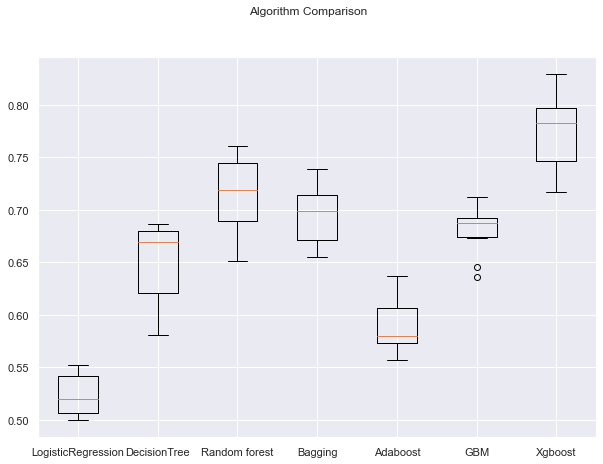

In [412]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Model Building with Over sampled data


* Before Over Sampling the data, the class distribution is 

In [413]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

Percentage of classes in training set:
0    0.944893
1    0.055107
Name: Target, dtype: float64


In [414]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

* After Over Sampling the data, the class distribution is

In [415]:
print("Percentage of classes in training set:")
print(y_train_over.value_counts(normalize=True))

Percentage of classes in training set:
0    0.5
1    0.5
Name: Target, dtype: float64


In [416]:
X_train_over.shape

(52914, 40)

In [417]:
X = X_train_over
y = y_train_over
data_sample = '_oversampled'

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogisticRegression", LogisticRegression(random_state=1, solver='newton-cg')))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X, y=y, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    score = cv_result.mean() * 100
    print("{}: {}".format(name, score))
    dict_key = name + data_sample
    All_Results[dict_key] = score 

print("\n" "Performance in Validation data:" "\n")

for name, model in models:
    model.fit(X, y)
    score = model_performance_classification_sklearn(model,X_val,y_val)
    scores = score.iloc[0]['Minimum_Vs_Model_cost'] * 100
    print("{}: {}".format(name, scores))
    dict_key = name + data_sample
    dict_key = dict_key + '_Validation'
    All_Results[dict_key] = scores 


Cross-Validation Performance:

LogisticRegression: 79.40984786587808
DecisionTree: 94.01861217925251
Random forest: 97.1952035999941
Bagging: 95.75355501921703
Adaboost: 83.19322841604645
GBM: 87.28991668797381
Xgboost: 97.58309648832963

Performance in Validation data:

LogisticRegression: 50.536228093120585
DecisionTree: 63.240589198036
Random forest: 80.836820083682
Bagging: 74.88372093023256
Adaboost: 57.79240203410111
GBM: 73.20954907161804
Xgboost: 80.66805845511482


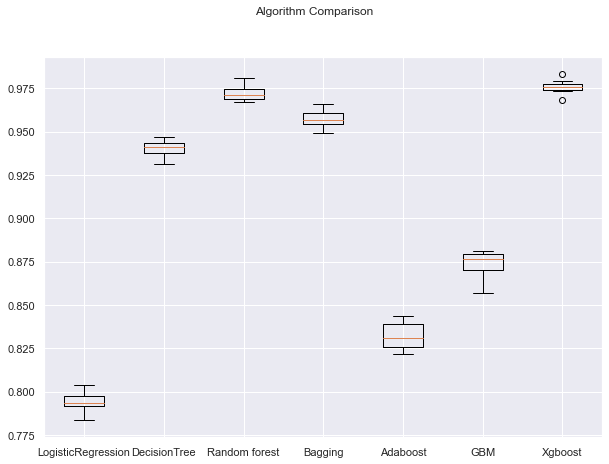

In [418]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

We can see that XGBOOST is giving the highest cross-validated recall followed by RandomForest.
RandomForest and XGBoost can be potential candidates for performance tuning.

## Model Building with Under sampled data

* Before Under Sampling the data, the class distribution is

In [424]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

Percentage of classes in training set:
0    0.944893
1    0.055107
Name: Target, dtype: float64


In [427]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

* After Under Sampling the data, the class distribution is

In [426]:
print("Percentage of classes in training set:")
print(y_train_un.value_counts(normalize=True))

Percentage of classes in training set:
0    0.5
1    0.5
Name: Target, dtype: float64


In [420]:
X = X_train_un
y = y_train_un
data_sample = '_undersampled'

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogisticRegression", LogisticRegression(random_state=1, solver='newton-cg')))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10
    cv_result = cross_val_score(
        estimator=model, X=X, y=y, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    score = cv_result.mean() * 100
    print("{}: {}".format(name, score))
    dict_key = name + data_sample
    All_Results[dict_key] = score 

print("\n" "Performance in Validation data:" "\n")

for name, model in models:
    model.fit(X, y)
    score = model_performance_classification_sklearn(model,X_val,y_val)
    scores = score.iloc[0]['Minimum_Vs_Model_cost'] * 100
    print("{}: {}".format(name, scores))
    dict_key = name + data_sample
    dict_key = dict_key + 'Validation'
    All_Results[dict_key] = scores 


Cross-Validation Performance:

LogisticRegression: 77.96837541564223
DecisionTree: 77.62112457810912
Random forest: 84.84438354374095
Bagging: 81.74829074330015
Adaboost: 80.08772346318565
GBM: 83.40938371506861
Xgboost: 84.87637818095986

Performance in Validation data:

LogisticRegression: 48.80020207123011
DecisionTree: 45.967166309778726
Random forest: 71.92851824274014
Bagging: 67.01352757544224
Adaboost: 53.28185328185329
GBM: 65.33648968549205
Xgboost: 75.1458576429405


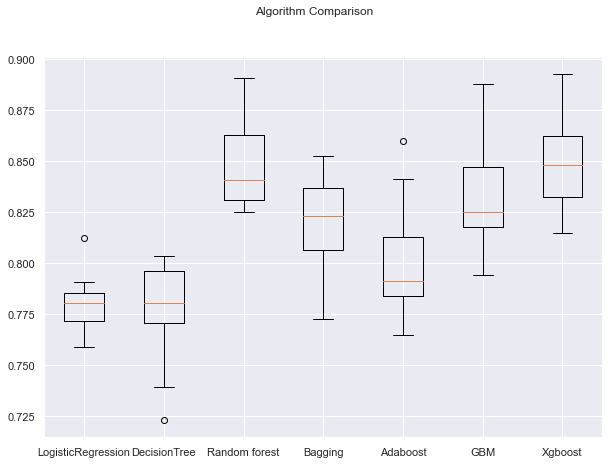

In [430]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

We can see that XGBOOST is giving the highest cross-validated recall followed by RandomForest.

* Lets see the results of all the models wrt to training and validation

In [428]:
All_Results

{'LogisticRegression_original_data': 52.35892533471536,
 'DecisionTree_original_data': 65.10054473324213,
 'Random forest_original_data': 71.53861239850332,
 'Bagging_original_data': 69.43885217772146,
 'Adaboost_original_data': 58.79589095944772,
 'GBM_original_data': 68.1172554037155,
 'Xgboost_original_data': 77.45266458451022,
 'LogisticRegression_original_data_Validation': 53.047775947281714,
 'DecisionTree_original_data_Validation': 67.2,
 'Random forest_original_data_Validation': 72.93318233295584,
 'Bagging_original_data_Validation': 70.38251366120218,
 'Adaboost_original_data_Validation': 60.2996254681648,
 'GBM_original_data_Validation': 68.58359957401491,
 'Xgboost_original_data_Validation': 77.52808988764045,
 'LogisticRegression_oversampled': 79.40984786587808,
 'DecisionTree_oversampled': 94.01861217925251,
 'Random forest_oversampled': 97.1952035999941,
 'Bagging_oversampled': 95.75355501921703,
 'Adaboost_oversampled': 83.19322841604645,
 'GBM_oversampled': 87.289916687

## Model Selection

* Lets select a mix of models from original Data, over Sampled Data and UnderSampled Data 
- 1  'Random forest_original_data'
- 2  'GBM_oversampled'
- 3  'Xgboost_undersampled'

- The reason is of the models from original Data, over Sampled Data and UnderSampled Data the above three have generalized behaviour ( The difference between training and validation  is less )

- We will also select other models that have good performance and have metric near to .78 before tuning
- so the final list of model selected for tuning

## HyperparameterTuning 

- **Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

#### For XGBoost:
param_grid={'n_estimators':np.arange(150,300,50),'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2], 'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

#### For Gradient Boosting:
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]}


#### For Adaboost:
param_grid = {
    "n_estimators": np.arange(10, 110, 20),
    "learning_rate": [ 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)]}

#### For logistic Regression:
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#### For Bagging Classifier:
param_grid = {
              'max_samples': [0.8,0.9], 
              'max_features': [0.8,0.9],
              'n_estimators' : [40,50]}

#### For Random Forest:
param_grid = {
    "n_estimators": [150,250],
    "min_samples_leaf": np.arange(1, 3),
    "max_features": ['sqrt','log2'],
    "max_samples": np.arange(0.2, 0.6, 0.1)}

#### For Decision Trees:
param_grid = {'max_depth': np.arange(2,20), 
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001]
             }

### 1- Random Forest - With Original Data - Tuning - GridSearchCV

In [321]:
%%time 
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
rf_param_grid = { "n_estimators": [150,250],
              "min_samples_leaf": np.arange(1, 3), 
              "max_features": ['sqrt','log2'], 
              "max_samples": np.arange(0.2, 0.6, 0.1)
             }


# Type of scoring used to compare parameter combinations
acc_scorer = scoring = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, rf_param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Best parameters are {'max_features': 'sqrt', 'max_samples': 0.5000000000000001, 'min_samples_leaf': 1, 'n_estimators': 150} with CV score=0.6920011507337778:
Wall time: 29min 22s


Training performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0   0.99325  0.879456   0.997794  0.934895               0.832255
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.986833  0.765528      0.986  0.861888               0.717149


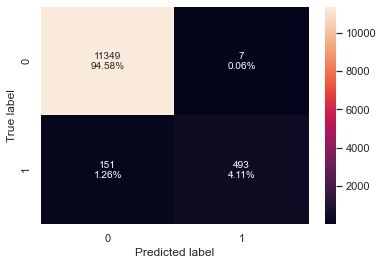

In [436]:

#Calculating different metrics
rf_tuned_train_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_train_perf)
rf_tuned_val_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_val,y_val)
print("Validation performance:\n",rf_tuned_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned, X_val, y_val)

In [456]:
rf_tuned_test_perf=model_performance_classification_sklearn(rf_estimator_tuned_random,X_test,y_test)
print("Test performance:\n",rf_tuned_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0     0.984  0.716636   0.987406  0.830508               0.677819


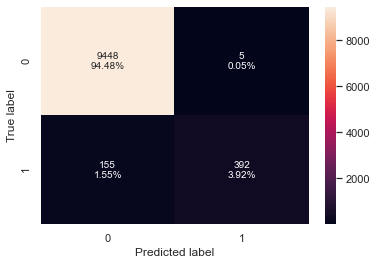

In [457]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

### 2(a)-Gradient Boost Classifier - With Oversampled Data - Tuning - GridSearchCV

In [316]:
%%time 
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
gbc_param_grid = { "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
               "n_estimators": np.arange(75,150,25),
               "learning_rate": [0.2, 0.05, 1], 
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7]}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, gbc_param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Best parameters are {'init': DecisionTreeClassifier(random_state=1), 'learning_rate': 0.2, 'max_features': 0.5, 'n_estimators': 75, 'subsample': 0.5} with CV score=0.9375687323384628:
Wall time: 2h 37min 26s


Training performance:
    Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.949083  0.801242   0.516517  0.628119               0.632406


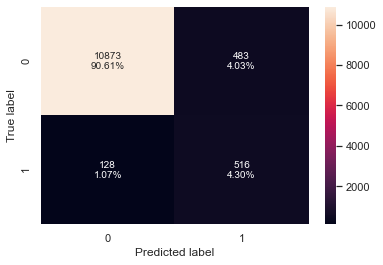

In [437]:
#Calculating different metrics
gbc_tuned_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train_over,y_train_over)
print("Training performance:\n",gbc_tuned_train_perf)
gbc_tuned_val_perf=model_performance_classification_sklearn(gbc_tuned,X_val,y_val)
print("Validation performance:\n",gbc_tuned_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

In [458]:
gbc_tuned_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Test performance:\n",gbc_tuned_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9476  0.786106    0.51374  0.621387               0.623243


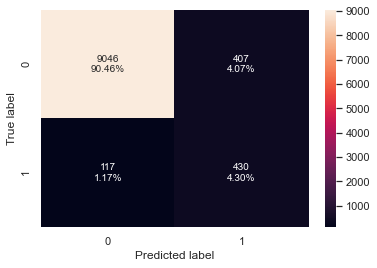

In [459]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

### 2(b)-Gradient Boost Classifier - With Oversampled Data - Tuning - RandomizedSearchCV

In [329]:
%%time 
# Choose the type of classifier. 
gbc_tuned_random = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
gbc_param_grid_rand = { "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
               "n_estimators": np.arange(75,150,25),
               "learning_rate": [0.2, 0.05, 1], 
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7]}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = RandomizedSearchCV(gbc_tuned_random, gbc_param_grid_rand, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gbc_tuned_random = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_random.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9375687323384628:
Wall time: 26min 38s


Training performance:
    Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.949083  0.801242   0.516517  0.628119               0.632406


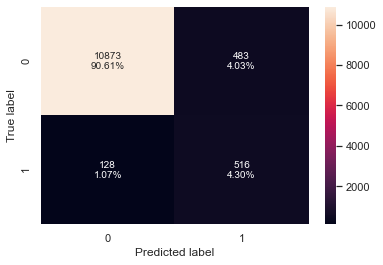

In [438]:
#Calculating different metrics
gbc_tuned_rnd_train_perf=model_performance_classification_sklearn(gbc_tuned_random,X_train_over,y_train_over)
print("Training performance:\n",gbc_tuned_rnd_train_perf)
gbc_tuned_rnd_val_perf=model_performance_classification_sklearn(gbc_tuned_random,X_val,y_val)
print("Validation performance:\n",gbc_tuned_rnd_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned_random, X_val, y_val)

In [460]:
gbc_tuned_rnd_test_perf=model_performance_classification_sklearn(gbc_tuned_random,X_test,y_test)
print("Test performance:\n",gbc_tuned_rnd_test_perf)

Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9476  0.786106    0.51374  0.621387               0.623243


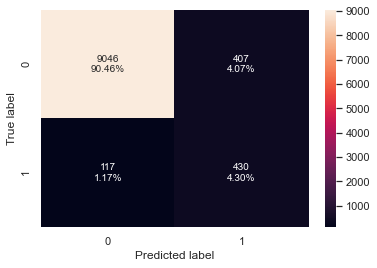

In [461]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned_random, X_test, y_test)

* Both randon and gridSearch give the same results in this case

### 3(a)- Xgboost Classifier - With Undersampled Data - Tuning - GridSearchCV

In [320]:
%%time 

# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
xgb_param_grid={'n_estimators':np.arange(150,300,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, xgb_param_grid,scoring=acc_scorer,cv=5,n_jobs = -1, verbose= 2)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are {'gamma': 5, 'learning_rate': 0.2, 'n_estimators': 150, 'scale_pos_weight': 10, 'subsample': 0.9} with CV score=0.8662574260510754:
Wall time: 5min 17s


Training performance:
    Accuracy  Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.993843     1.0   0.987836  0.993881               0.995912
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.894917  0.919255   0.328706  0.484254               0.568068


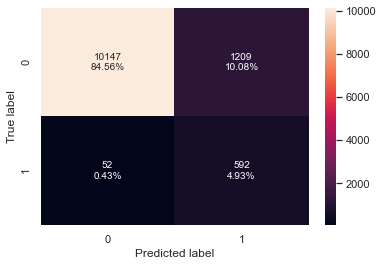

In [441]:
#Calculating different metrics
xgb_tuned_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train_un,y_train_un)
print("Training performance:\n",xgb_tuned_train_perf)
xgb_tuned_val_perf=model_performance_classification_sklearn(xgb_tuned,X_val,y_val)
print("Validation performance:\n",xgb_tuned_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.8857  0.893967   0.310673  0.461103               0.544098


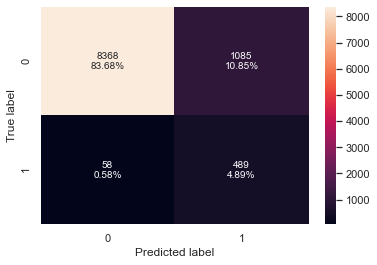

In [455]:
xgb_tuned_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Test performance:\n",xgb_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

### 3(b)- Xgboost Classifier - With Undersampled Data - Tuning - RandomizedSearchCV

In [331]:
%%time 

# Choose the type of classifier. 
xgb_tuned_random = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
xgb_param_grid_random={'n_estimators':np.arange(150,300,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned_random, xgb_param_grid_random,scoring=acc_scorer,cv=5,n_jobs = -1, verbose= 2)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
xgb_tuned_random = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_random.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.8652393832286936:
Wall time: 50.7 s


Training performance:
    Accuracy  Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.994491     1.0   0.989103  0.994521               0.996341
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0   0.89825  0.919255   0.336173  0.492308               0.574829


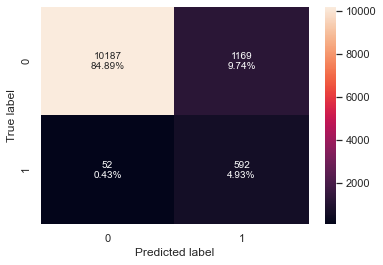

In [442]:
#Calculating different metrics
xgb_tuned_rnd_train_perf=model_performance_classification_sklearn(xgb_tuned_random,X_train_un,y_train_un)
print("Training performance:\n",xgb_tuned_rnd_train_perf)
xgb_tuned_rnd_val_perf=model_performance_classification_sklearn(xgb_tuned_random,X_val,y_val)
print("Validation performance:\n",xgb_tuned_rnd_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_random, X_val, y_val)

Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.8893  0.893967   0.317945  0.469065               0.550671


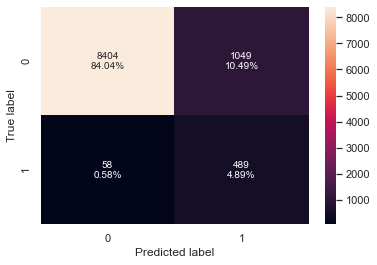

In [454]:
xgb_tuned_rnd_test_perf=model_performance_classification_sklearn(xgb_tuned_random,X_test,y_test)
print("Test performance:\n",xgb_tuned_rnd_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_random, X_test, y_test)

* Both gird and Random search tuning give the same performance

###  4- Xgboost with original data - Tuning - GridSearchCV

In [351]:
%time 

# Choose the type of classifier. 
xgb_tuned_orig = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
xgb_param_grid={'n_estimators':np.arange(150,300,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned_orig, xgb_param_grid,scoring=acc_scorer,cv=5,n_jobs = -1, verbose= 2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_orig = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_orig.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Wall time: 0 ns
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are {'gamma': 5, 'learning_rate': 0.1, 'n_estimators': 250, 'scale_pos_weight': 10, 'subsample': 0.8} with CV score=0.8049422330772502:


Training performance:
    Accuracy  Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.999321     1.0   0.987836  0.993881               0.995912
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9905  0.869565   0.949153  0.907618               0.811083


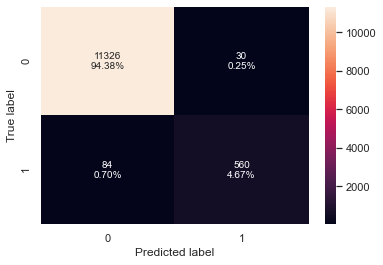

In [487]:
#Calculating different metrics
xgb_tuned_orig_train_perf=model_performance_classification_sklearn(xgb_tuned_orig,X_train,y_train)
print("Training performance:\n",xgb_tuned_orig_train_perf)
xgb_tuned_orig_val_perf=model_performance_classification_sklearn(xgb_tuned_orig,X_val,y_val)
print("Validation performance:\n",xgb_tuned_orig_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_orig, X_val, y_val)

Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9901  0.864717   0.949799  0.905263               0.805992


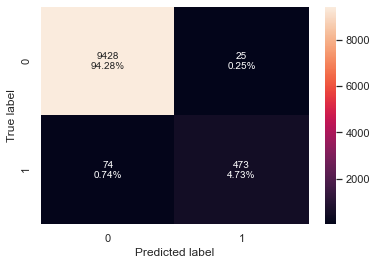

In [453]:
xgb_tuned_orig_test_perf=model_performance_classification_sklearn(xgb_tuned_orig,X_test,y_test)
print("Test performance:\n",xgb_tuned_orig_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_orig, X_test, y_test)

* This model gives somewhat balanced performance and the metric is more than .78

### 5- Random forest with over sampled data - Tuning

In [354]:
%%time 
# Choose the type of classifier. 
rf_estimator_tuned_over = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
rf_param_grid = { "n_estimators": [150,250],
              "min_samples_leaf": np.arange(1, 3), 
              "max_features": ['sqrt','log2'], 
              "max_samples": np.arange(0.2, 0.6, 0.1)
             }


# Type of scoring used to compare parameter combinations
acc_scorer = scoring = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned_over, rf_param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_estimator_tuned_over = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned_over.fit(X_train_over, y_train_over)
print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Best parameters are {'max_features': 'sqrt', 'max_samples': 0.5000000000000001, 'min_samples_leaf': 1, 'n_estimators': 150} with CV score=0.9605285516090613:
Wall time: 50min 40s


Training performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.998583  0.997505   0.999659  0.998581               0.995747
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.988667  0.874224   0.911003  0.892235               0.807692


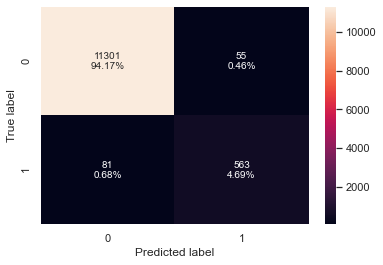

In [463]:
#Calculating different metrics
rf_estimator_tuned_over_train_perf=model_performance_classification_sklearn(rf_estimator_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",rf_estimator_tuned_over_train_perf)
rf_estimator_tuned_over_val_perf=model_performance_classification_sklearn(rf_estimator_tuned_over,X_val,y_val)
print("Validation performance:\n",rf_estimator_tuned_over_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned_over, X_val, y_val)


Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9893  0.862888   0.936508  0.898192                0.80127


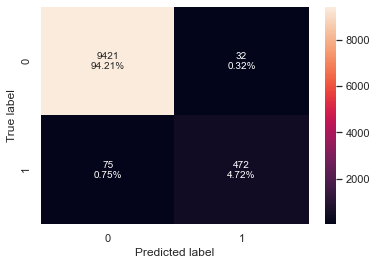

In [464]:
rf_estimator_tuned_over_test_perf=model_performance_classification_sklearn(rf_estimator_tuned_over,X_test,y_test)
print("Test performance:\n",rf_estimator_tuned_over_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned_over, X_test, y_test)

* This model gives somewhat balanced performance and the metric is more than .78

 ### 6- Xgboost with over sampled data - Tuning

In [356]:
%time 

# Choose the type of classifier. 
xgb_tuned_over = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
xgb_param_grid={'n_estimators':np.arange(150,300,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned_over, xgb_param_grid,scoring=acc_scorer,cv=5,n_jobs = -1, verbose= 2)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned_over = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_over.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Wall time: 0 ns
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'n_estimators': 250, 'scale_pos_weight': 10, 'subsample': 0.9} with CV score=0.9887520365943508:


Training performance:
    Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.986667  0.899068    0.85905  0.878604               0.821429


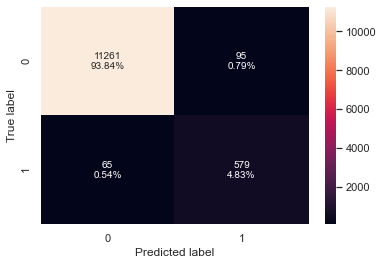

In [466]:
#Calculating different metrics
xgb_tuned_over_train_perf=model_performance_classification_sklearn(xgb_tuned_over,X_train_un,y_train_un)
print("Training performance:\n",xgb_tuned_over_train_perf)
xgb_tuned_over_val_perf=model_performance_classification_sklearn(xgb_tuned_over,X_val,y_val)
print("Validation performance:\n",xgb_tuned_over_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_over, X_val, y_val)



Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9841  0.872029   0.842756  0.857143               0.788942


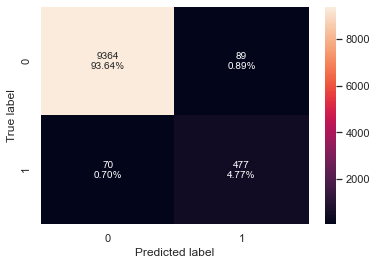

In [467]:
xgb_tuned_over_test_perf=model_performance_classification_sklearn(xgb_tuned_over,X_test,y_test)
print("Test performance:\n",xgb_tuned_over_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_over, X_test, y_test)

* This model gives some what balanced performance and the metric is close to .78

Lets check the important features for model **Xgboost with original data**

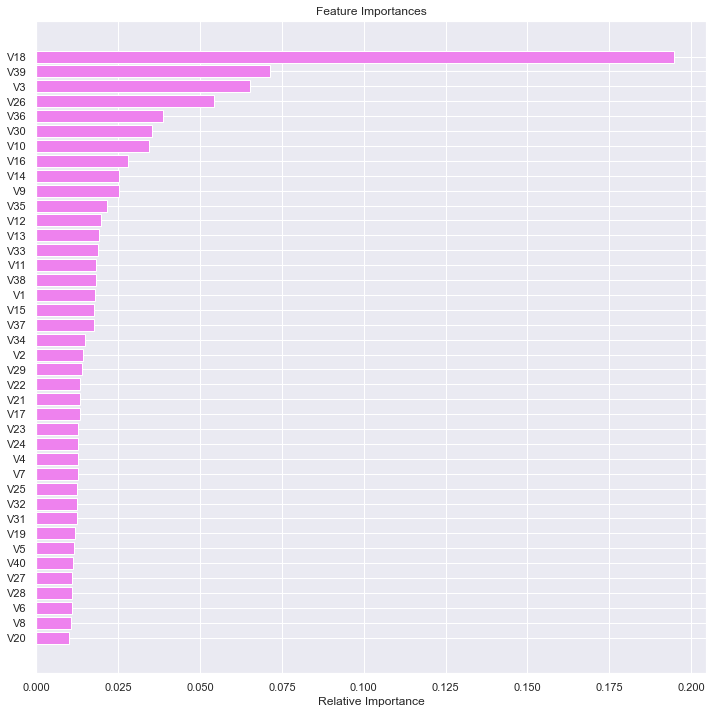

In [489]:
importances = xgb_tuned_orig.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Variable V18 is the important feature

## Model Performance comparison and choosing the final model

- From the metric "Minimum_Vs_Model_cost"
- The best model is  **"Random forest with over sampled data"**

Training performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.998583  0.997505   0.999659  0.998581               0.995747
Validation performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.988667  0.874224   0.911003  0.892235               0.807692


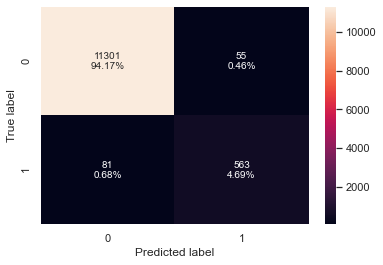

In [474]:
#Calculating different metrics
rf_estimator_tuned_over_train_perf=model_performance_classification_sklearn(rf_estimator_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",rf_estimator_tuned_over_train_perf)
rf_estimator_tuned_over_val_perf=model_performance_classification_sklearn(rf_estimator_tuned_over,X_val,y_val)
print("Validation performance:\n",rf_estimator_tuned_over_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned_over, X_val, y_val)

## Test set final performance

Test performance:
    Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9893  0.862888   0.936508  0.898192                0.80127


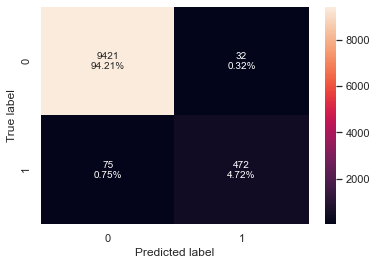

In [475]:

rf_estimator_tuned_over_test_perf=model_performance_classification_sklearn(rf_estimator_tuned_over,X_test,y_test)
print("Test performance:\n",rf_estimator_tuned_over_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned_over, X_test, y_test)

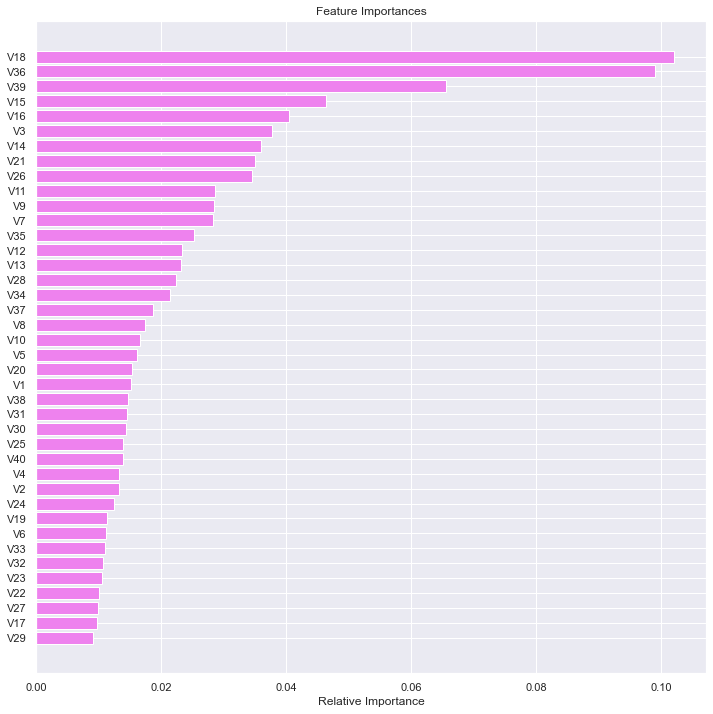

In [490]:
importances = rf_estimator_tuned_over.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Variable V18 and V36 are import features that determine the failure and helps to minimize the cost

## Pipelines to build the final model


In [384]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

In [385]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", numeric_transformer),
        (
            "RF_OverSampled",
             RandomForestClassifier(random_state=1,
                max_features='sqrt',
                max_samples=0.5000000000000001,
                min_samples_leaf=1,
                n_estimators=150,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_over, y_train_over)

Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='median'))])),
                ('RF_OverSampled',
                 RandomForestClassifier(max_features='sqrt',
                                        max_samples=0.5000000000000001,
                                        n_estimators=150, random_state=1))])

# Business Insights and Conclusions

1. Variable V18 and V36 are the important features.
2. From the model performance in test set, there is an 80% probability that failures can be identified.
3. Both the models that have more than .78 performance on test data, exhibit overfit, thus the performance in real time might be impacted.
4. Since the ratio of the failure class is less, more data can be collected on the failure class.